# Predicting Chronic Complications in Diabetes Patients
## Value-Based Healthcare Analysis Case Study

**Author:** Sherif Rizk  
**Date:** August 2025  
**Objective:** Predict whether a patient is at risk of developing chronic complications

---

## Project Overview

This comprehensive analysis focuses on predicting chronic complications in diabetes patients using machine learning techniques. The project follows a systematic approach to understand, clean, prepare, and model the data to provide actionable insights for healthcare practitioners.

### Key Objectives:
1. **Understand the Data**: Familiarize with dataset structure and column meanings
2. **Prepare the Data**: Handle inconsistencies and ensure data validity for modeling
3. **Build Predictive Model**: Develop and evaluate machine learning models
4. **Draw Conclusions**: Summarize findings and identify key factors for chronic complications

### Deliverables:
- ✅ Well-documented Jupyter Notebook with clear comments
- ✅ Comprehensive data analysis and model evaluation
- ✅ CSV file with predictions for new patients
- ✅ Clinical insights and recommendations

## 1. Import Required Libraries and Setup

Setting up the environment with necessary libraries for data analysis, machine learning, and visualization.

In [2]:
# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
import os
from datetime import datetime

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, 
    roc_curve, precision_recall_curve
)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Create results directory
os.makedirs('results', exist_ok=True)

print("✅ All libraries imported successfully!")
print("📁 Results directory created/verified!")
print("🎨 Visualization settings configured!")

✅ All libraries imported successfully!
📁 Results directory created/verified!
🎨 Visualization settings configured!


## 2. Load and Explore the Dataset

Loading the diabetes complications dataset and performing initial exploration to understand its structure and basic characteristics.

In [3]:
# Load the diabetes complications dataset
data_file_path = 'data/Data_DM.xlsx'

try:
    # Load training data
    df = pd.read_excel(data_file_path, sheet_name='Data_Set')
    print("✅ Training dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"👥 Total patients: {len(df)}")
    print(f"🔢 Total features: {len(df.columns)}")
    
    # Load prediction data
    df_predict = pd.read_excel(data_file_path, sheet_name='Predict')
    print(f"\n✅ Prediction dataset loaded successfully!")
    print(f"📊 Prediction dataset shape: {df_predict.shape}")
    print(f"👥 Patients to predict: {len(df_predict)}")
    
except FileNotFoundError:
    print("❌ Error: Data file not found. Please ensure 'data/Data_DM.xlsx' exists.")
except Exception as e:
    print(f"❌ Error loading data: {e}")

# Display basic information about the dataset
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\n📈 Dataset Info:")
print(df.info())

print(f"\n📊 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n🎯 Target Variable Distribution:")
if 'Chronic_flag' in df.columns:
    target_counts = df['Chronic_flag'].value_counts()
    print(f"No complications (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
    print(f"Complications (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")
else:
    print("Target variable 'Chronic_flag' not found!")

✅ Training dataset loaded successfully!
📊 Dataset shape: (12611, 27)
👥 Total patients: 12611
🔢 Total features: 27

✅ Prediction dataset loaded successfully!
📊 Prediction dataset shape: (5022, 26)
👥 Patients to predict: 5022

DATASET OVERVIEW

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique_Identifier          12611 non-null  object        
 1   Gender                     12611 non-null  object        
 2   Religion                   12611 non-null  object        
 3   Nationality                12611 non-null  object        
 4   Avg_HBA1C Results          12611 non-null  object        
 5   HBA1C test Compliance      12611 non-null  object        
 6   D_Of_Birth                 12611 non-null  datetime64[ns]
 7   Diagnosis_Type             12611 non-null  object        
 8

## 3. Data Understanding and Initial Analysis

Analyzing the structure, data types, missing values, and understanding the meaning of each feature in our diabetes complications dataset.

In [4]:
# Detailed data understanding and analysis
print("="*80)
print("DETAILED DATA ANALYSIS")
print("="*80)

# 1. Data Types Analysis
print("\n🔍 Data Types Analysis:")
print("-" * 40)
data_types = df.dtypes.value_counts()
for dtype, count in data_types.items():
    print(f"{dtype}: {count} columns")

# 2. Missing Values Analysis
print("\n🚨 Missing Values Analysis:")
print("-" * 40)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")

# 3. Categorical Variables Analysis
print("\n📊 Categorical Variables Analysis:")
print("-" * 40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values: {value_counts.head().to_dict()}")

# 4. Numerical Variables Analysis
print("\n🔢 Numerical Variables Analysis:")
print("-" * 40)
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {len(numerical_cols)}")
print("Basic statistics:")
print(df[numerical_cols].describe().round(2))

# 5. Feature Categories
print("\n🏷️ Feature Categories:")
print("-" * 40)
feature_categories = {
    'Demographics': ['Unique_Identifier', 'Gender', 'Religion', 'Nationality', 'D_Of_Birth'],
    'Medical_History': ['Diagnosis_Type', 'Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr', 
                       'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr'],
    'HBA1C_Related': ['Avg_HBA1C Results', 'HBA1C test Compliance'],
    'Comorbidities': ['Comorbidity', 'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
                     'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
                     'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
                     'Obesity', 'Stroke'],
    'Target': ['Chronic_flag']
}

for category, features in feature_categories.items():
    available_features = [f for f in features if f in df.columns]
    print(f"{category}: {len(available_features)} features")
    print(f"  {available_features}")

print(f"\n✅ Data understanding completed!")
print(f"📝 Ready for data cleaning and preprocessing!")

DETAILED DATA ANALYSIS

🔍 Data Types Analysis:
----------------------------------------
int64: 19 columns
object: 7 columns
datetime64[ns]: 1 columns

🚨 Missing Values Analysis:
----------------------------------------
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found in the dataset!

📊 Categorical Variables Analysis:
----------------------------------------

Unique_Identifier:
  Unique values: 12611
  Top 5 values: {'SGH11015': 1, 'SGH11016': 1, 'SGH11017': 1, 'SGH11018': 1, 'SGH11019': 1}

Gender:
  Unique values: 2
  Top 5 values: {'Male': 6802, 'Female': 5809}

Religion:
  Unique values: 22
  Top 5 values: {'Islam': 8115, 'OTHER': 2185, 'ISLAM': 1100, 'JEWISH': 668, 'Unknown': 337}

Nationality:
  Unique values: 170
  Top 5 values: {'Saudi': 7110, 'SAUDI': 1796, 'Egyptian': 669, 'EGYPTIAN': 506, 'Pakistani': 181}

Avg_HBA1C Results:
  Unique values: 4872
  Top 5 values: {"Haven't performed Before": 3411, 5.2: 155, 5.3: 148, 5.4

## 4. Data Cleaning and Preprocessing

Cleaning categorical variables, handling inconsistencies, and preparing the data for analysis. This step ensures data quality and consistency across all features.

In [5]:
# Data Cleaning and Preprocessing
print("="*80)
print("DATA CLEANING AND PREPROCESSING")
print("="*80)

# Create a copy of the original data
df_clean = df.copy()
print(f"📋 Working with a copy of the original data: {df_clean.shape}")

# 1. Clean Categorical Variables
print("\n🧹 1. Cleaning Categorical Variables:")
print("-" * 50)

# 1.1 Clean Religion column
print("Cleaning Religion column...")
original_religion = df_clean['Religion'].value_counts()
print(f"Original Religion values: {original_religion.to_dict()}")

df_clean['Religion'] = df_clean['Religion'].str.strip()
df_clean['Religion'] = df_clean['Religion'].replace({
    # Islamic variants
    'ISLAM': 'Islam',
    'MUSLIM': 'Islam',
    
    # Christian variants
    'CHRISTIAN': 'Christian',
    'Catholic': 'Christian',
    'Methodist': 'Christian', 
    'Orthodox': 'Christian',
    'Greek Orthodox': 'Christian',
    'Uniting Church': 'Christian',
    'United Church of Christ in Phi': 'Christian',  # Truncated: "Philippines"
    # Other Christian denominations Jehovas Witness
    'Jehovas Witness': 'Christian',

    # Other major religions
    'HINDU': 'Hindu',
    'BUDDHIST': 'Buddhist',
    'JEWISH': 'Jewish',
    
    
    # Unknown/Not specified categories
    'Unknown': 'Unknown/Not Specified',
    'Unknown/Not Known': 'Unknown/Not Specified',
    'Not Specified': 'Unknown/Not Specified',
    'No Religion': 'No Religion',
    
    # Other categories
    'OTHER': 'Other',
    'Others': 'Other'
})

cleaned_religion = df_clean['Religion'].value_counts()
print(f"Cleaned Religion values: {cleaned_religion.to_dict()}")

# 1.2 Clean Nationality column
print("\nCleaning Nationality column...")
original_nationality = df_clean['Nationality'].value_counts()
print(f"Original Nationality values: {original_nationality.to_dict()}")

df_clean['Nationality'] = df_clean['Nationality'].str.strip()
df_clean['Nationality'] = df_clean['Nationality'].replace({
    # Afghan/Afghanistan variants
    'Afghan': 'Afghan',
    'AFGHAN': 'Afghan',
    'AFGHANISTAN': 'Afghan',
    
    # African (general/unspecified)
    'AFRICAN': 'African',
    'African': 'African',
    
    # Albanian variants
    'ALBANIAN': 'Albanian',
    'Albanian': 'Albanian',
    
    # Algerian variants
    'Algeria': 'Algerian',
    'ALGERIAN': 'Algerian',
    'Algerian': 'Algerian',
    
    # American variants
    'AMERICAN': 'American',
    'American': 'American',
    'AMERICAN SAMOA': 'American',
    
    # Australian variants
    'Australia': 'Australian',
    'Australian': 'Australian',
    
    # Austrian variants
    'AUSTRIAN': 'Austrian',
    
    # Azerbaijani variants
    'AZERBAIJANI': 'Azerbaijani',
    
    # Bahamian variants
    'BAHAMIAN': 'Bahamian',
    
    # Bahraini variants
    'BAHRAINI': 'Bahraini',
    
    # Bangladeshi variants
    'Bangladeshi': 'Bangladeshi',
    'BANGLADESHI': 'Bangladeshi',
    'BANGLADISHI': 'Bangladeshi',
    
    # Other single entries
    'Barbadian': 'Barbadian',
    'Belarusian': 'Belarusian',
    'Belgian': 'Belgian',
    
    # Brazilian variants
    'Brazil': 'Brazilian',
    
    # British variants
    'BRITISH': 'British',
    
    # Burmese/Myanmar variants
    'BURMESE': 'Burmese',
    'MYANMAR': 'Burmese',
    
    # Cameroonian variants
    'Cameroonian': 'Cameroonian',
    
    # Canadian variants
    'CANADIAN': 'Canadian',
    'Canadian': 'Canadian',
    
    # Chadian variants
    'Chad': 'Chadian',
    'Chadian': 'Chadian',
    
    # Chinese variants
    'CHINESE': 'Chinese',
    'Chinese': 'Chinese',
    
    # Djiboutian variants
    'DJIBOUTIAN': 'Djiboutian',
    
    # Dutch variants
    'DUTCH': 'Dutch',
    
    # Egyptian variants
    'EGYPTIAN': 'Egyptian',
    'Egyptian': 'Egyptian',
    
    # Emirati variants
    'Emirati': 'Emirati',
    
    # Eritrean variants
    'ERITREAN': 'Eritrean',
    'Eritrean': 'Eritrean',
    'ERYTRIAN': 'Eritrean',  # Spelling error correction
    
    # Ethiopian variants
    'Ethiopia': 'Ethiopian',
    'ETHIOPIA': 'Ethiopian',
    'ETHIOPIAN': 'Ethiopian',
    'Ethiopian': 'Ethiopian',
    
    # Fijian variants
    'FIJIAN': 'Fijian',
    
    # Filipino/Philippine variants
    'Filipino': 'Filipino',
    'FILIPINO': 'Filipino',
    'Philippine': 'Filipino',
    'PHILIPPINES': 'Filipino',
    'PHILLIPINO': 'Filipino',  # Spelling error correction
    
    # Finnish variants
    'FINLAND': 'Finnish',
    'Finnish': 'Finnish',
    
    # French variants
    'FRENCH': 'French',
    'French': 'French',
    
    # Gambian variants
    'GAMBIAN': 'Gambian',
    
    # German variants
    'German': 'German',
    'GERMANY': 'German',
    
    # Ghanaian variants
    'GHANAIAN': 'Ghanaian',
    
    # Greek variants
    'Greec': 'Greek',  # Spelling error correction
    
    # Indian variants
    'INDIAN': 'Indian',
    'Indian': 'Indian',
    'Indionisa': 'Indonesian',  # Likely spelling error for Indonesian
    
    # Indonesian variants
    'INDONESIA': 'Indonesian',
    'Indonesian': 'Indonesian',
    'INDONESIAN': 'Indonesian',
    
    # Iraqi variants
    'Iraqi': 'Iraqi',
    
    # Irish variants
    'IRELAND': 'Irish',
    'Irish': 'Irish',
    
    # Italian variants
    'Italian': 'Italian',
    'Italy': 'Italian',
    
    # Jordanian variants
    'Jordanian': 'Jordanian',
    'JORDANIAN': 'Jordanian',
    'JORDON': 'Jordanian',  # Spelling error correction
    
    # Kenyan variants
    'Kenya': 'Kenyan',
    'KENYA': 'Kenyan',
    'Kenyan': 'Kenyan',
    
    # Kuwaiti variants
    'KUWAIT': 'Kuwaiti',
    'KUWAITI': 'Kuwaiti',
    'Kuwaiti': 'Kuwaiti',
    
    # Sri Lankan variants
    'Lankan': 'Sri Lankan',
    'SRI LANKAN': 'Sri Lankan',
    'Sri Lankan': 'Sri Lankan',
    
    # Lebanese variants
    'Lebanen': 'Lebanese',  # Spelling error correction
    'Lebanese': 'Lebanese',
    'LEBANESE': 'Lebanese',
    'LEBANON (Lebanese)': 'Lebanese',
    
    # Libyan variants
    'Libyan': 'Libyan',
    
    # Malaysian variants
    'MALAYSIA': 'Malaysian',
    'MALAYSIAN': 'Malaysian',
    'Malaysian': 'Malaysian',
    
    # Maldivian variants
    'MALDIVIAN': 'Maldivian',
    
    # Malian variants
    'MALIAN': 'Malian',
    
    # Martinican variants
    'Martinican': 'Martinican',
    
    # Mauritanian variants
    'MAURITANIA': 'Mauritanian',
    'MAURITANIAN': 'Mauritanian',
    
    # Mauritian variants
    'MAURITIAN': 'Mauritian',
    
    # Moroccan variants
    'MOROCCAN': 'Moroccan',
    'Moroccan': 'Moroccan',
    
    # Nepalese variants
    'NEPALESE': 'Nepalese',
    'Nepali': 'Nepalese',
    'NEPALI': 'Nepalese',
    
    # New Zealand variants
    'New Zealand': 'New Zealander',
    
    # Nigerian variants
    'NIGER': 'Nigerian',  # Assuming this refers to Nigerian
    'Nigeria': 'Nigerian',
    'NIGERIAN': 'Nigerian',
    'Nigerian': 'Nigerian',
    
    # North Korean variants
    'North Korean': 'North Korean',
    
    # Omani variants
    'Omani': 'Omani',
    
    # Pakistani variants
    'PAKISTANI': 'Pakistani',
    'Pakistani': 'Pakistani',
    
    # Palestinian variants
    'PALASTINIAN': 'Palestinian',  # Spelling error correction
    'Palestine': 'Palestinian',
    'PALESTINE': 'Palestinian',
    'Palestinian': 'Palestinian',
    'PALESTINIAN': 'Palestinian',
    
    # Palauan variants
    'Palauan': 'Palauan',
    
    # Portuguese variants
    'Portuguese': 'Portuguese',
    
    # Qatari variants
    'Qatari': 'Qatari',
    'QATARI': 'Qatari',
    
    # Romanian variants
    'Romania': 'Romanian',
    
    # Samoan variants
    'Samoan': 'Samoan',
    
    # Saudi variants
    'Saudi': 'Saudi',
    'SAUDI': 'Saudi',
    'SAUDI ARABIA': 'Saudi',
    'SAUDI FOREIGN PASSPORT': 'Saudi',
    
    # Senegalese variants
    'SENEGAL': 'Senegalese',
    'Senegalese': 'Senegalese',
    
    # Sierra Leonean variants
    'SIERRA LEONE': 'Sierra Leonean',
    'Sierra Leonean': 'Sierra Leonean',
    
    # Somali variants
    'Somali': 'Somali',
    'Somalia': 'Somali',
    
    # South African variants
    'SOUTH AFRICAN': 'South African',
    
    # Spanish variants
    'SPANISH': 'Spanish',
    'Spanish': 'Spanish',
    
    # Sudanese variants
    'Sudan': 'Sudanese',
    'SUDAN': 'Sudanese',
    'SUDANESE': 'Sudanese',
    'Sudanese': 'Sudanese',
    'Do Not Use Sudani': 'Sudanese',  # Data entry note
    
    # Surinamese variants
    'Surinamese': 'Surinamese',
    
    # Swedish variants
    'Swedish': 'Swedish',
    'Svalbard and Jan Mayen': 'Norwegian',  # Geographic correction
    
    # Syrian variants
    'SYRIAN': 'Syrian',
    'Syrian': 'Syrian',
    
    # Taiwanese variants
    'TAIWANESE': 'Taiwanese',
    'Taiwanese': 'Taiwanese',
    
    # Tunisian variants
    'TUNISIAN': 'Tunisian',
    
    # Turkish variants
    'Turki': 'Turkish',  # Spelling error correction
    'Turkish': 'Turkish',
    'TURKY': 'Turkish',  # Spelling error correction
    
    # Ugandan variants
    'UGANDAN': 'Ugandan',
    
    # West Indian variants
    'WEST INDIAN': 'West Indian',
    
    # Yemeni variants
    'YEMEN': 'Yemeni',
    'Yemen': 'Yemeni',
    'Yemeni': 'Yemeni',
    'YEMENI': 'Yemeni',
    'NORTH YEMENI': 'Yemeni',
    
    # Zambian variants
    'ZAMBIAN': 'Zambian',
    
    # Niger country (if different from Nigerian)
    'ALNIGER': 'Nigerien',  # People from Niger country are "Nigerien"
    
    # Andorran variants
    'Andorran': 'Andorran',
    
    # Angolan variants
    'ANGOLAN': 'Angolan',
    
    # Arabian (general term)
    'Arabian': 'Arabian',
    
    # Other/Unknown categories
    'OTHER': 'Other',
    'Other': 'Other',
    'Not in use': 'Unknown/Not Specified',
    '-': 'Unknown/Not Specified'
})

cleaned_nationality = df_clean['Nationality'].value_counts()
print(f"Cleaned Nationality values: {cleaned_nationality.to_dict()}")

# 1.3 Clean HBA1C test Compliance
print("\nCleaning HBA1C test Compliance column...")
if 'HBA1C test Compliance' in df_clean.columns:
    original_compliance = df_clean['HBA1C test Compliance'].value_counts()
    print(f"Original HBA1C Compliance values: {original_compliance.to_dict()}")
    
    df_clean['HBA1C test Compliance'] = df_clean['HBA1C test Compliance'].str.strip()
    
    cleaned_compliance = df_clean['HBA1C test Compliance'].value_counts()
    print(f"Cleaned HBA1C Compliance values: {cleaned_compliance.to_dict()}")

# 2. Handle HBA1C Results
print("\n💉 2. Processing HBA1C Results:")
print("-" * 50)

# Check HBA1C results values
print("HBA1C Results analysis:")
hba1c_values = df_clean['Avg_HBA1C Results'].value_counts()
print(f"Unique HBA1C values (top 10): {dict(list(hba1c_values.head(10).items()))}")

# Create numeric HBA1C column
df_clean['HBA1C_Numeric'] = pd.to_numeric(df_clean['Avg_HBA1C Results'], errors='coerce')
numeric_count = df_clean['HBA1C_Numeric'].notna().sum()
print(f"Successfully converted {numeric_count} HBA1C values to numeric")

# Create binary flag for HBA1C test performed
df_clean['HBA1C_Test_Performed'] = (df_clean['Avg_HBA1C Results'] != "Haven't performed Before").astype(int)
test_performed = df_clean['HBA1C_Test_Performed'].value_counts()
print(f"HBA1C Test Performed: {test_performed.to_dict()}")

# 3. Data Validation
print("\n✅ 3. Data Validation:")
print("-" * 50)

# Check for any remaining data quality issues
print("Checking for data quality issues...")

# Binary columns should only have 0 and 1
binary_cols = ['Acute_flag', 'ER_flag_bef_chronic', 'Comorbidity', 'Chronic_flag'] + [
    'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
    'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
    'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
    'Obesity', 'Stroke'
]

print("Validating binary columns:")
for col in binary_cols:
    if col in df_clean.columns:
        unique_vals = df_clean[col].unique()
        if not all(val in [0, 1] for val in unique_vals if pd.notna(val)):
            print(f"⚠️ {col} has non-binary values: {unique_vals}")
        else:
            print(f"✅ {col} - Valid binary column")

# Check count columns for negative values
count_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
print("\nValidating count columns:")
for col in count_cols:
    if col in df_clean.columns:
        min_val = df_clean[col].min()
        if min_val < 0:
            print(f"⚠️ {col} has negative values: min = {min_val}")
        else:
            print(f"✅ {col} - Valid count column (min = {min_val})")

print(f"\n✅ Data cleaning completed!")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")

DATA CLEANING AND PREPROCESSING
📋 Working with a copy of the original data: (12611, 27)

🧹 1. Cleaning Categorical Variables:
--------------------------------------------------
Cleaning Religion column...
Original Religion values: {'Islam': 8115, 'OTHER': 2185, 'ISLAM': 1100, 'JEWISH': 668, 'Unknown': 337, 'Others': 86, 'MUSLIM': 60, 'Christian': 27, 'Unknown/Not Known': 7, 'Not Specified': 6, 'Catholic': 3, 'CHRISTIAN': 3, 'HINDU': 2, 'Uniting Church': 2, 'United Church of Christ in Phi': 2, 'No Religion': 2, 'Jehovas Witness': 1, 'BUDDHIST': 1, 'Orthodox': 1, 'Methodist': 1, 'Greek Orthodox': 1, 'Hindu': 1}
Cleaned Religion values: {'Islam': 9275, 'Other': 2271, 'Jewish': 668, 'Unknown/Not Specified': 350, 'Christian': 41, 'Hindu': 3, 'No Religion': 2, 'Buddhist': 1}

Cleaning Nationality column...
Original Nationality values: {'Saudi': 7110, 'SAUDI': 1796, 'Egyptian': 669, 'EGYPTIAN': 506, 'Pakistani': 181, 'Yemeni': 174, 'Yemen': 136, 'INDIAN': 122, 'Indian': 112, 'PAKISTANI': 106,

## 5. Feature Engineering

Creating new meaningful features from existing data including age calculation, HBA1C categorization, and aggregated comorbidity features to enhance model performance.

In [5]:
# Feature Engineering
print("="*80)
print("FEATURE ENGINEERING")
print("="*80)

# 1. Calculate Age from Date of Birth
print("\n📅 1. Age Calculation:")
print("-" * 50)

if 'D_Of_Birth' in df_clean.columns:
    # Convert to datetime and calculate age
    df_clean['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_clean['D_Of_Birth'], errors='coerce').dt.year
    
    # Handle any invalid ages
    age_stats = df_clean['Age'].describe()
    print(f"Age statistics:")
    print(f"  Mean: {age_stats['mean']:.1f} years")
    print(f"  Range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
    print(f"  Missing ages: {df_clean['Age'].isna().sum()}")
    
    # Create age groups
    df_clean['Age_Group'] = pd.cut(
        df_clean['Age'], 
        bins=[0, 30, 45, 60, 75, 100], 
        labels=['<30', '30-44', '45-59', '60-74', '75+'],
        include_lowest=True
    )
    
    age_group_dist = df_clean['Age_Group'].value_counts()
    print(f"Age group distribution: {age_group_dist.to_dict()}")

# 2. HBA1C Categorization
print("\n🩸 2. HBA1C Categorization:")
print("-" * 50)

# Create HBA1C categories based on medical standards
df_clean['HBA1C_Category'] = pd.cut(
    df_clean['HBA1C_Numeric'], 
    bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
    labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
    include_lowest=True
)

# Convert to string to allow adding new categories
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].astype(str)

# Fill missing values for those who haven't performed the test
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].fillna('No Test')

# Convert back to categorical
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].astype('category')

hba1c_cat_dist = df_clean['HBA1C_Category'].value_counts()
print(f"HBA1C Category distribution: {hba1c_cat_dist.to_dict()}")

# 3. Comorbidity Feature Engineering
print("\n🏥 3. Comorbidity Feature Engineering:")
print("-" * 50)

# Define comorbidity groups
comorbidity_cols = [
    'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
    'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
    'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
    'Obesity', 'Stroke'
]

# Filter to only existing columns
available_comorbidity_cols = [col for col in comorbidity_cols if col in df_clean.columns]
print(f"Available comorbidity columns: {len(available_comorbidity_cols)}")

# Total number of comorbidities
df_clean['Total_Comorbidities'] = df_clean[available_comorbidity_cols].sum(axis=1)

# Cardiovascular comorbidities
cv_comorbidities = [
    'Cardio Vascular Disease', 'Heart Failure', 'Hypertension', 
    'Ischemic Heart Disease', 'Myocardial Infarction'
]
available_cv_comorbidities = [col for col in cv_comorbidities if col in df_clean.columns]
df_clean['CV_Comorbidities'] = df_clean[available_cv_comorbidities].sum(axis=1)

# Severe comorbidities (life-threatening conditions)
severe_comorbidities = ['Cancer', 'Renal Insufficiency', 'Heart Failure', 'Stroke']
available_severe_comorbidities = [col for col in severe_comorbidities if col in df_clean.columns]
df_clean['Severe_Comorbidities'] = df_clean[available_severe_comorbidities].sum(axis=1)

# Comorbidity statistics
print(f"Total Comorbidities - Mean: {df_clean['Total_Comorbidities'].mean():.2f}")
comorbidity_dist = df_clean['Total_Comorbidities'].value_counts().sort_index()
print(f"Total Comorbidities distribution: {comorbidity_dist.to_dict()}")

print(f"CV Comorbidities - Mean: {df_clean['CV_Comorbidities'].mean():.2f}")
print(f"Severe Comorbidities - Mean: {df_clean['Severe_Comorbidities'].mean():.2f}")

# 4. Healthcare Utilization Features
print("\n🏥 4. Healthcare Utilization Features:")
print("-" * 50)

# Create healthcare utilization intensity features
healthcare_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
available_healthcare_cols = [col for col in healthcare_cols if col in df_clean.columns]

if available_healthcare_cols:
    df_clean['Total_Healthcare_Visits'] = df_clean[available_healthcare_cols].sum(axis=1)
    
    # High utilization flags
    if '# ER_befor_Chr' in df_clean.columns:
        df_clean['High_ER_Utilization'] = (df_clean['# ER_befor_Chr'] >= 3).astype(int)
    
    if '# IP_bef_chr' in df_clean.columns:
        df_clean['High_IP_Utilization'] = (df_clean['# IP_bef_chr'] >= 2).astype(int)
    
    healthcare_stats = df_clean['Total_Healthcare_Visits'].describe()
    print(f"Total Healthcare Visits statistics:")
    print(f"  Mean: {healthcare_stats['mean']:.2f}")
    print(f"  Max: {healthcare_stats['max']:.0f}")

print(f"\n✅ Feature engineering completed!")
print(f"📊 Enhanced dataset shape: {df_clean.shape}")
print(f"🆕 New features created: Age, Age_Group, HBA1C_Category, Total_Comorbidities, CV_Comorbidities, Severe_Comorbidities")

FEATURE ENGINEERING

📅 1. Age Calculation:
--------------------------------------------------
Age statistics:
  Mean: 53.9 years
  Range: 1 - 125 years
  Missing ages: 0
Age group distribution: {'45-59': 4033, '60-74': 3522, '30-44': 3432, '75+': 932, '<30': 681}

🩸 2. HBA1C Categorization:
--------------------------------------------------
HBA1C Category distribution: {np.str_('nan'): 3411, 'Normal': 3016, 'Prediabetes': 1835, 'Very Poor': 1789, 'Poor': 1375, 'Controlled': 1185}

🏥 3. Comorbidity Feature Engineering:
--------------------------------------------------
Available comorbidity columns: 11
Total Comorbidities - Mean: 0.53
Total Comorbidities distribution: {0: 6863, 1: 4924, 2: 723, 3: 89, 4: 12}
CV Comorbidities - Mean: 0.43
Severe Comorbidities - Mean: 0.06

🏥 4. Healthcare Utilization Features:
--------------------------------------------------
Total Healthcare Visits statistics:
  Mean: 0.45
  Max: 21

✅ Feature engineering completed!
📊 Enhanced dataset shape: (12611, 38

## 6. Exploratory Data Analysis and Visualization

Creating comprehensive visualizations to understand the relationships between features and the target variable, uncovering patterns that inform our modeling approach.

EXPLORATORY DATA ANALYSIS AND VISUALIZATION

🎯 1. Target Variable Analysis:
--------------------------------------------------


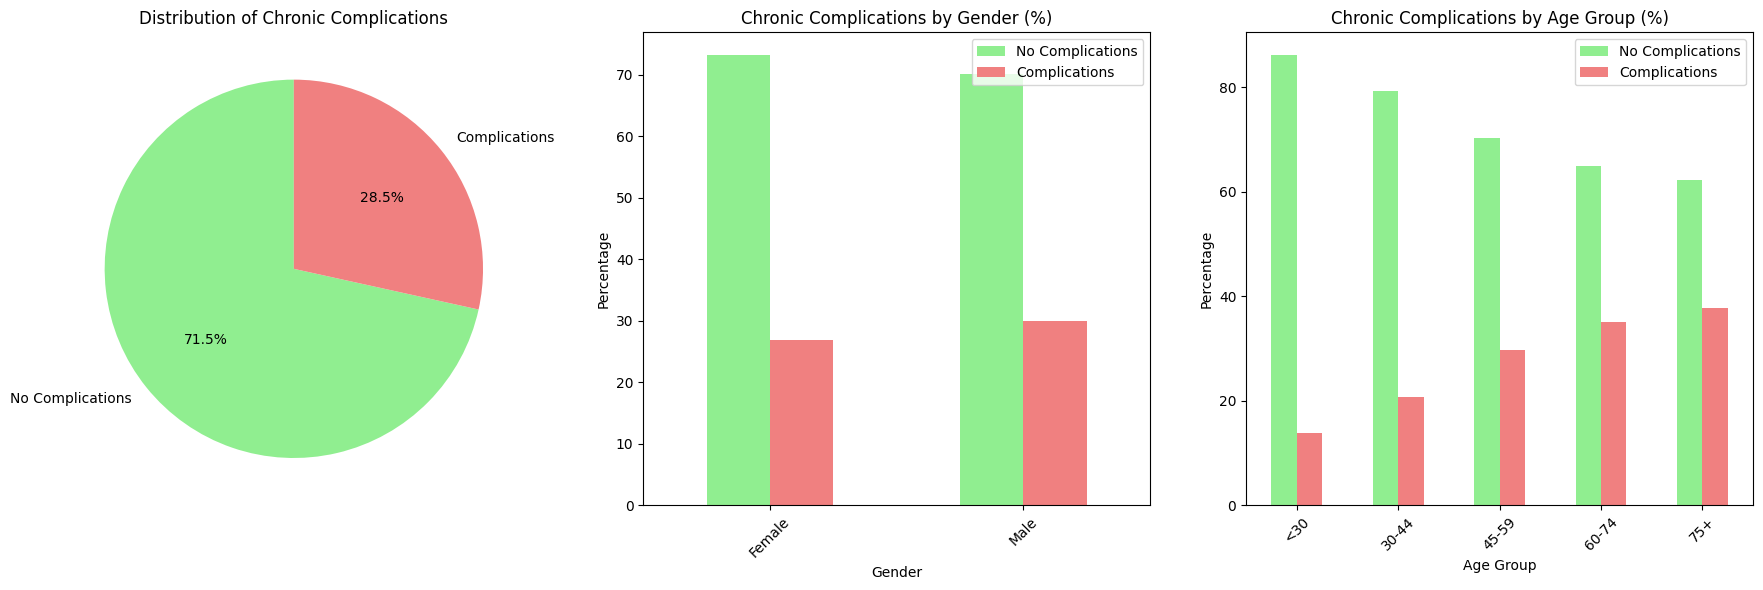


👥 2. Age and Demographics Analysis:
--------------------------------------------------


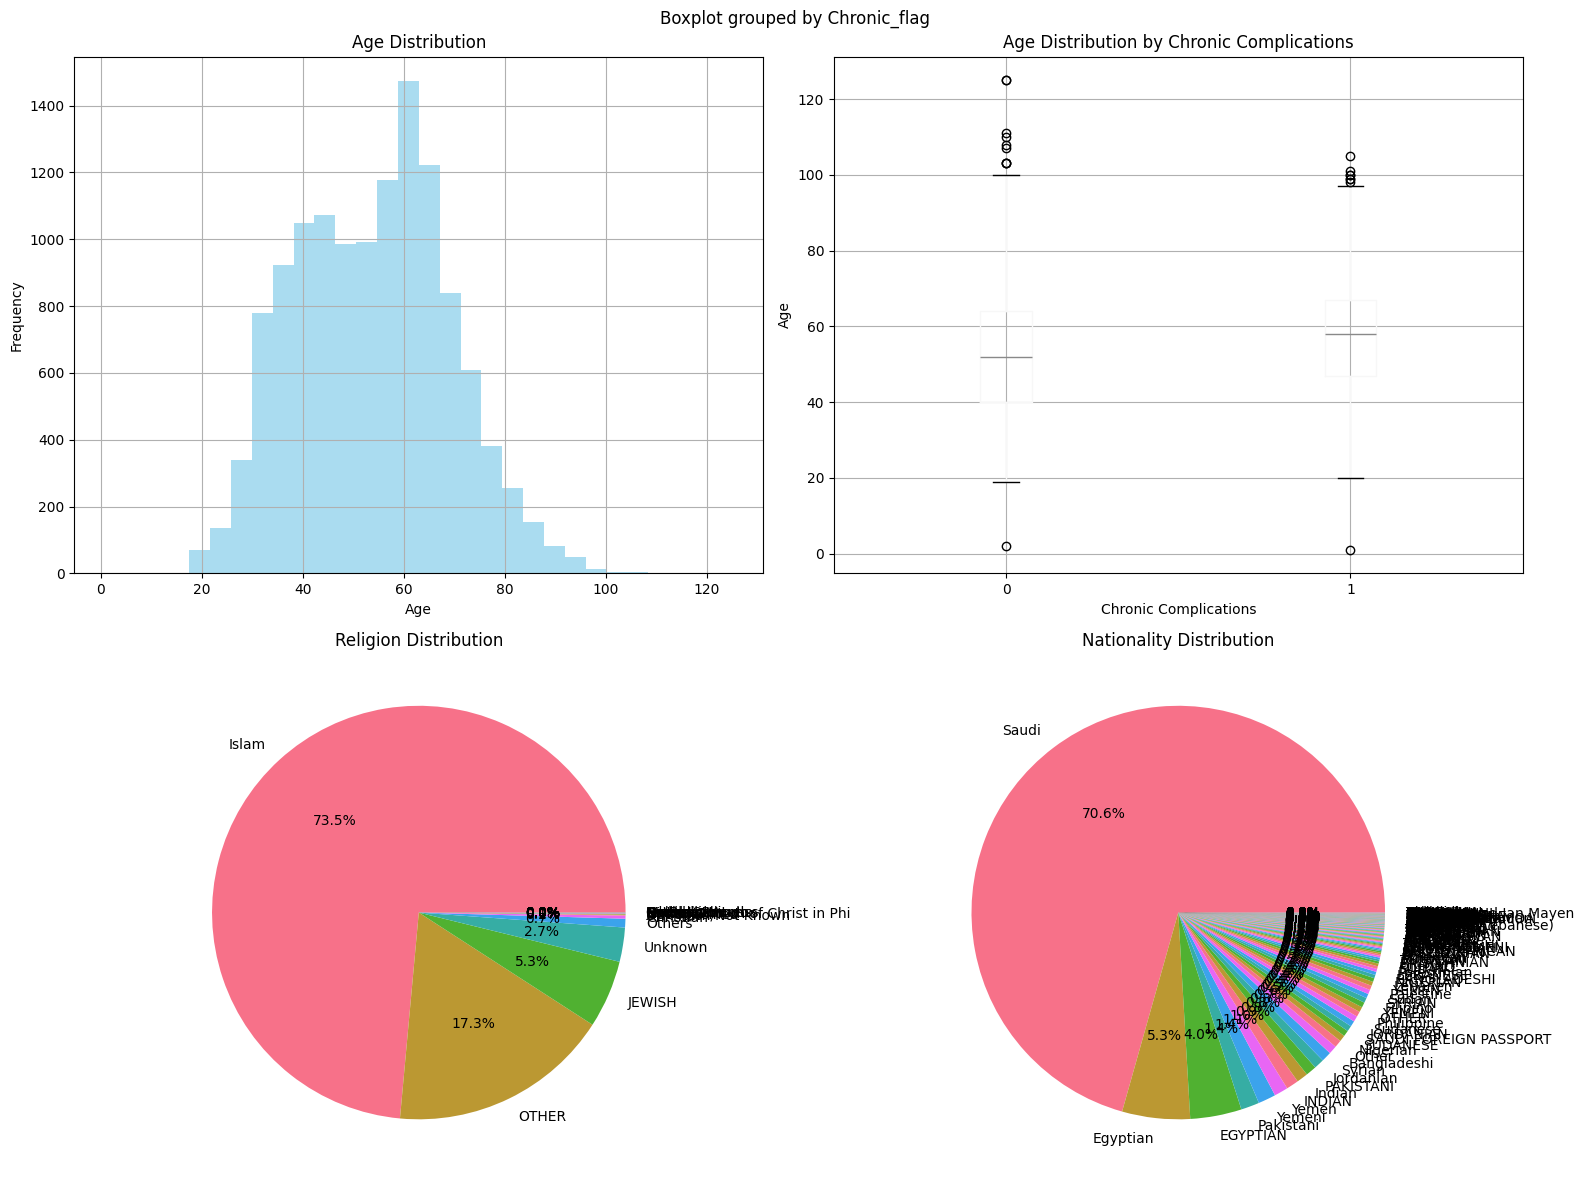


🩸 3. HBA1C Analysis:
--------------------------------------------------


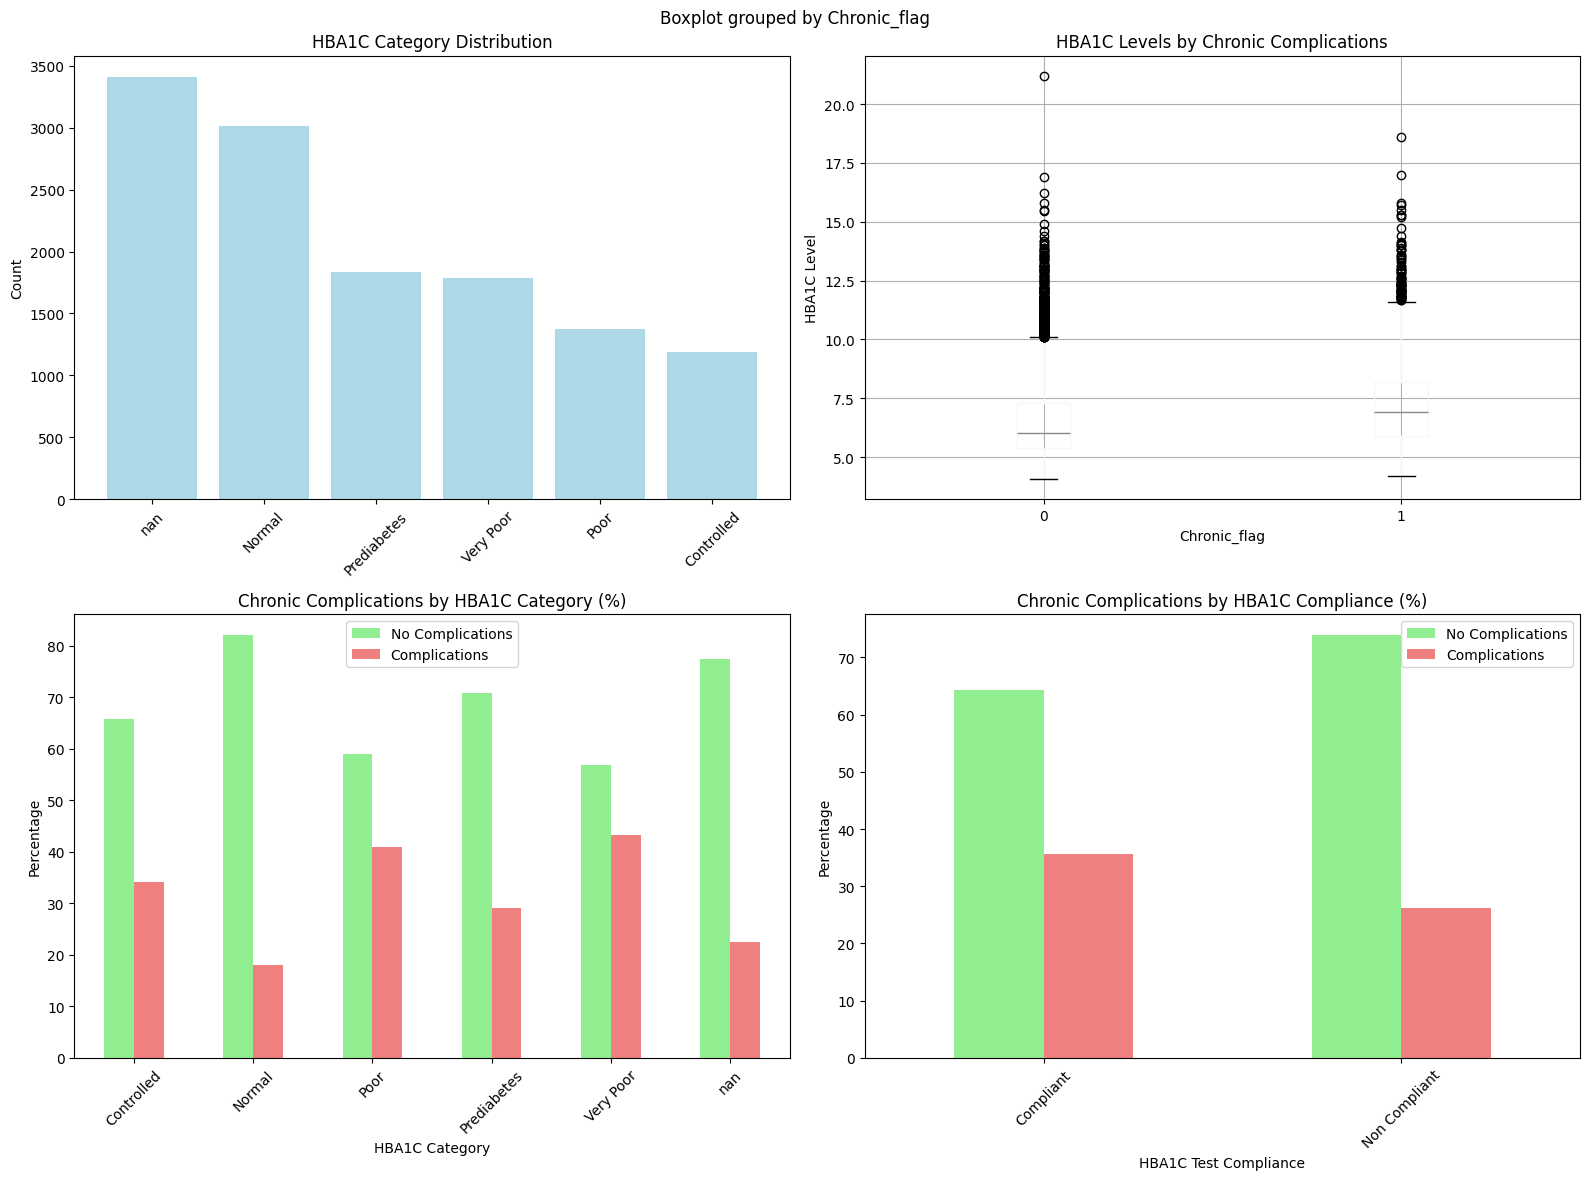


🏥 4. Comorbidity Analysis:
--------------------------------------------------


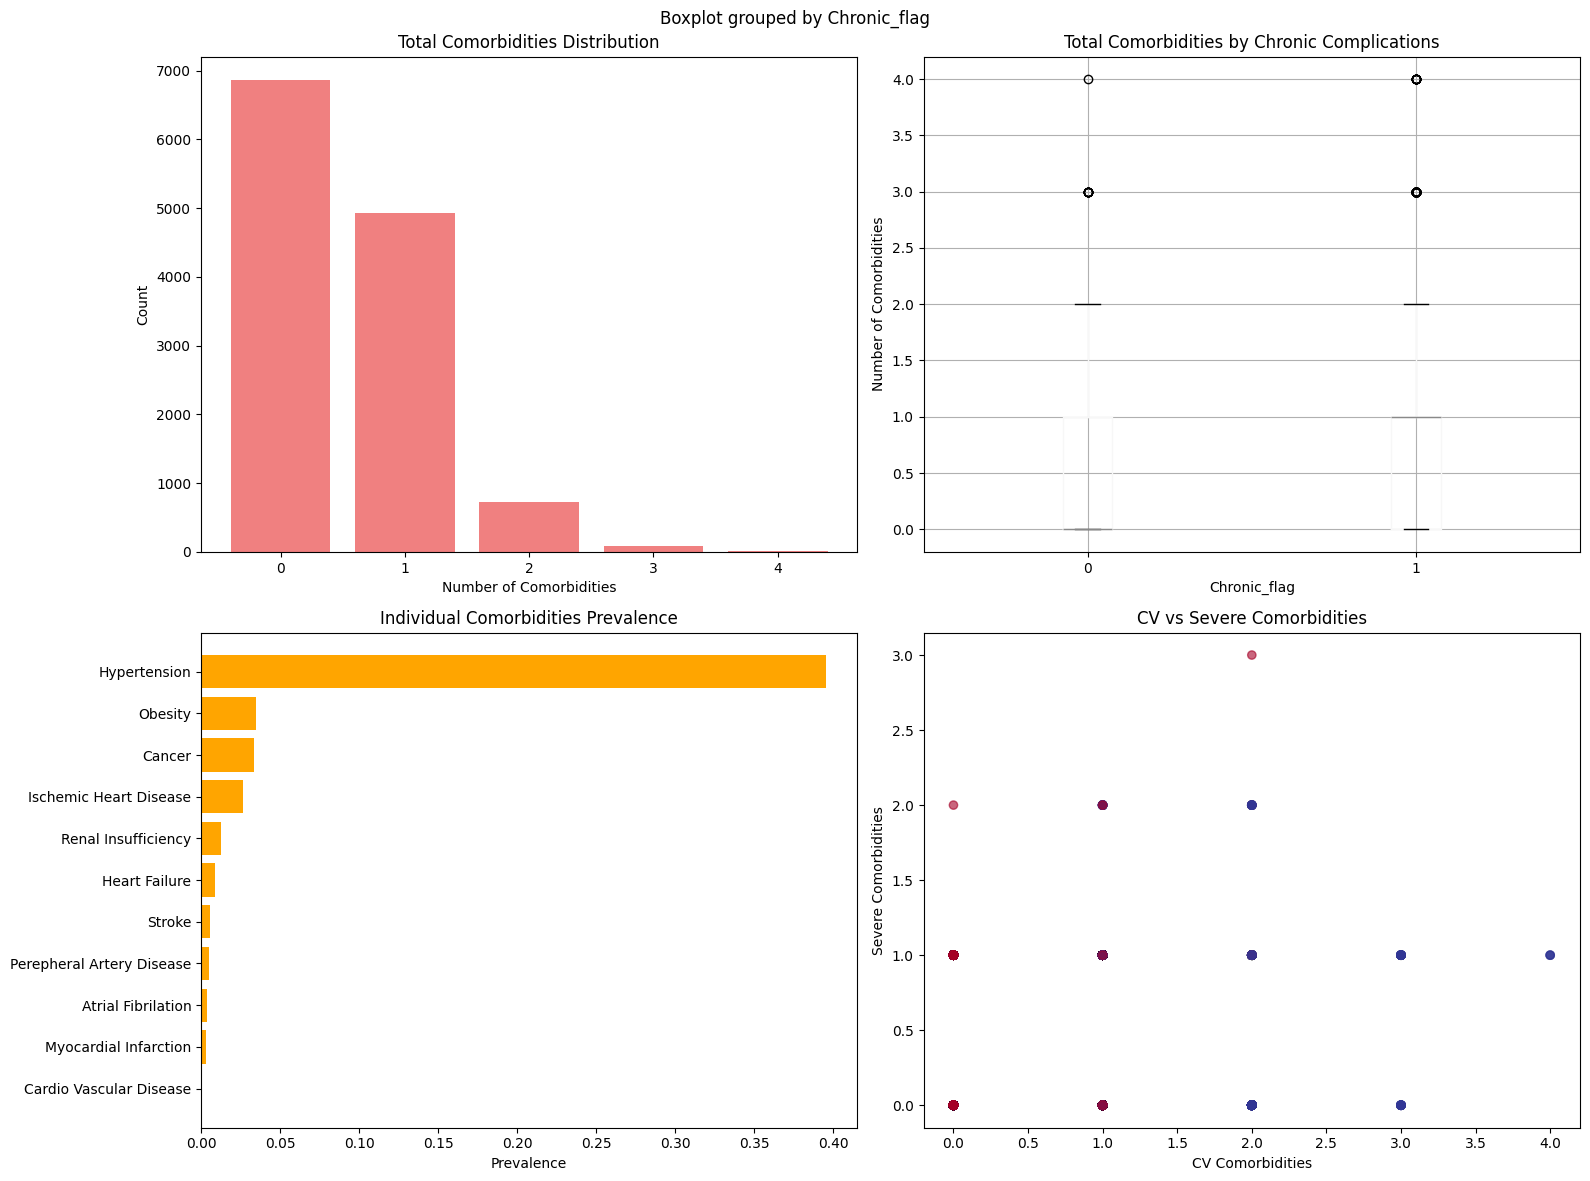


🏥 5. Healthcare Utilization Analysis:
--------------------------------------------------


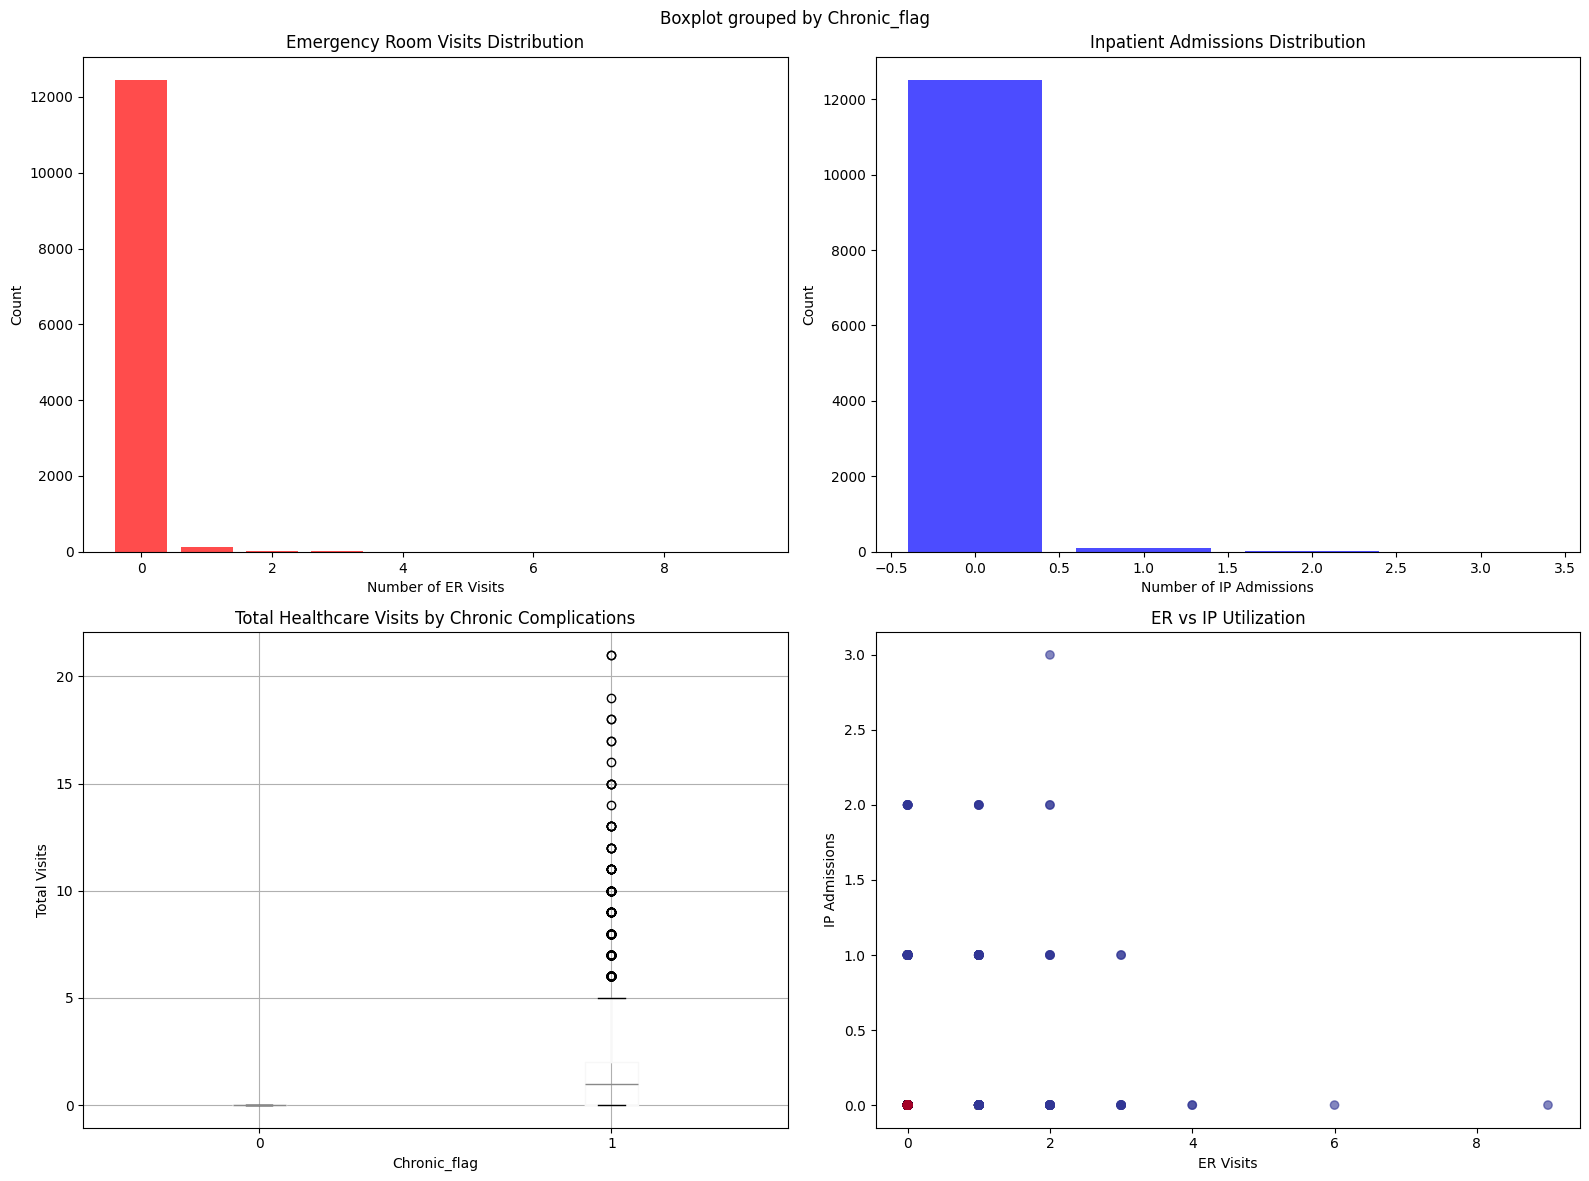


✅ Exploratory Data Analysis completed!
📊 Visualizations saved to results/ directory
🔍 Key insights discovered and ready for modeling!


In [6]:
# Exploratory Data Analysis and Visualization
print("="*80)
print("EXPLORATORY DATA ANALYSIS AND VISUALIZATION")
print("="*80)

# Set up the plotting environment
plt.rcParams['figure.figsize'] = (15, 10)

# 1. Target Variable Analysis
print("\n🎯 1. Target Variable Analysis:")
print("-" * 50)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Target distribution
target_counts = df_clean['Chronic_flag'].value_counts()
axes[0].pie(target_counts.values, labels=['No Complications', 'Complications'], 
           autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Distribution of Chronic Complications')

# Target by Gender
gender_chronic = pd.crosstab(df_clean['Gender'], df_clean['Chronic_flag'], normalize='index') * 100
gender_chronic.plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightcoral'])
axes[1].set_title('Chronic Complications by Gender (%)')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage')
axes[1].legend(['No Complications', 'Complications'])
axes[1].tick_params(axis='x', rotation=45)

# Target by Age Group
if 'Age_Group' in df_clean.columns:
    age_chronic = pd.crosstab(df_clean['Age_Group'], df_clean['Chronic_flag'], normalize='index') * 100
    age_chronic.plot(kind='bar', ax=axes[2], color=['lightgreen', 'lightcoral'])
    axes[2].set_title('Chronic Complications by Age Group (%)')
    axes[2].set_xlabel('Age Group')
    axes[2].set_ylabel('Percentage')
    axes[2].legend(['No Complications', 'Complications'])
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('results/target_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Age and Demographics Analysis
print("\n👥 2. Age and Demographics Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
df_clean['Age'].hist(bins=30, ax=axes[0,0], color='skyblue', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Age by Chronic flag
df_clean.boxplot(column='Age', by='Chronic_flag', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Chronic Complications')
axes[0,1].set_xlabel('Chronic Complications')
axes[0,1].set_ylabel('Age')

# Religion distribution
religion_counts = df_clean['Religion'].value_counts()
axes[1,0].pie(religion_counts.values, labels=religion_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Religion Distribution')

# Nationality distribution
nationality_counts = df_clean['Nationality'].value_counts()
axes[1,1].pie(nationality_counts.values, labels=nationality_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Nationality Distribution')

plt.tight_layout()
plt.savefig('results/demographics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. HBA1C Analysis
print("\n🩸 3. HBA1C Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# HBA1C Category distribution
hba1c_cat_counts = df_clean['HBA1C_Category'].value_counts()
axes[0,0].bar(range(len(hba1c_cat_counts)), hba1c_cat_counts.values, color='lightblue')
axes[0,0].set_xticks(range(len(hba1c_cat_counts)))
axes[0,0].set_xticklabels(hba1c_cat_counts.index, rotation=45)
axes[0,0].set_title('HBA1C Category Distribution')
axes[0,0].set_ylabel('Count')

# HBA1C by Chronic flag
if 'HBA1C_Numeric' in df_clean.columns:
    df_clean.boxplot(column='HBA1C_Numeric', by='Chronic_flag', ax=axes[0,1])
    axes[0,1].set_title('HBA1C Levels by Chronic Complications')
    axes[0,1].set_ylabel('HBA1C Level')

# HBA1C Category vs Chronic complications
hba1c_chronic = pd.crosstab(df_clean['HBA1C_Category'], df_clean['Chronic_flag'], normalize='index') * 100
hba1c_chronic.plot(kind='bar', ax=axes[1,0], color=['lightgreen', 'lightcoral'])
axes[1,0].set_title('Chronic Complications by HBA1C Category (%)')
axes[1,0].set_xlabel('HBA1C Category')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(['No Complications', 'Complications'])
axes[1,0].tick_params(axis='x', rotation=45)

# HBA1C Test Compliance
compliance_chronic = pd.crosstab(df_clean['HBA1C test Compliance'], df_clean['Chronic_flag'], normalize='index') * 100
compliance_chronic.plot(kind='bar', ax=axes[1,1], color=['lightgreen', 'lightcoral'])
axes[1,1].set_title('Chronic Complications by HBA1C Compliance (%)')
axes[1,1].set_xlabel('HBA1C Test Compliance')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(['No Complications', 'Complications'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('results/hba1c_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Comorbidity Analysis
print("\n🏥 4. Comorbidity Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Comorbidities distribution
comorbidity_counts = df_clean['Total_Comorbidities'].value_counts().sort_index()
axes[0,0].bar(comorbidity_counts.index, comorbidity_counts.values, color='lightcoral')
axes[0,0].set_title('Total Comorbidities Distribution')
axes[0,0].set_xlabel('Number of Comorbidities')
axes[0,0].set_ylabel('Count')

# Comorbidities vs Chronic flag
df_clean.boxplot(column='Total_Comorbidities', by='Chronic_flag', ax=axes[0,1])
axes[0,1].set_title('Total Comorbidities by Chronic Complications')
axes[0,1].set_ylabel('Number of Comorbidities')

# Individual comorbidities prevalence
individual_comorbidities = df_clean[available_comorbidity_cols].mean().sort_values(ascending=True)
axes[1,0].barh(range(len(individual_comorbidities)), individual_comorbidities.values, color='orange')
axes[1,0].set_yticks(range(len(individual_comorbidities)))
axes[1,0].set_yticklabels(individual_comorbidities.index)
axes[1,0].set_title('Individual Comorbidities Prevalence')
axes[1,0].set_xlabel('Prevalence')

# CV vs Severe Comorbidities
axes[1,1].scatter(df_clean['CV_Comorbidities'], df_clean['Severe_Comorbidities'], 
                 c=df_clean['Chronic_flag'], cmap='RdYlBu', alpha=0.6)
axes[1,1].set_title('CV vs Severe Comorbidities')
axes[1,1].set_xlabel('CV Comorbidities')
axes[1,1].set_ylabel('Severe Comorbidities')

plt.tight_layout()
plt.savefig('results/comorbidity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Healthcare Utilization Analysis
print("\n🏥 5. Healthcare Utilization Analysis:")
print("-" * 50)

if available_healthcare_cols:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # ER visits distribution
    if '# ER_befor_Chr' in df_clean.columns:
        er_counts = df_clean['# ER_befor_Chr'].value_counts().sort_index()
        axes[0,0].bar(er_counts.index, er_counts.values, color='red', alpha=0.7)
        axes[0,0].set_title('Emergency Room Visits Distribution')
        axes[0,0].set_xlabel('Number of ER Visits')
        axes[0,0].set_ylabel('Count')
    
    # IP admissions distribution
    if '# IP_bef_chr' in df_clean.columns:
        ip_counts = df_clean['# IP_bef_chr'].value_counts().sort_index()
        axes[0,1].bar(ip_counts.index, ip_counts.values, color='blue', alpha=0.7)
        axes[0,1].set_title('Inpatient Admissions Distribution')
        axes[0,1].set_xlabel('Number of IP Admissions')
        axes[0,1].set_ylabel('Count')
    
    # Healthcare utilization by chronic flag
    if 'Total_Healthcare_Visits' in df_clean.columns:
        df_clean.boxplot(column='Total_Healthcare_Visits', by='Chronic_flag', ax=axes[1,0])
        axes[1,0].set_title('Total Healthcare Visits by Chronic Complications')
        axes[1,0].set_ylabel('Total Visits')
    
    # ER vs IP utilization
    if all(col in df_clean.columns for col in ['# ER_befor_Chr', '# IP_bef_chr']):
        axes[1,1].scatter(df_clean['# ER_befor_Chr'], df_clean['# IP_bef_chr'], 
                         c=df_clean['Chronic_flag'], cmap='RdYlBu', alpha=0.6)
        axes[1,1].set_title('ER vs IP Utilization')
        axes[1,1].set_xlabel('ER Visits')
        axes[1,1].set_ylabel('IP Admissions')
    
    plt.tight_layout()
    plt.savefig('results/healthcare_utilization_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

print(f"\n✅ Exploratory Data Analysis completed!")
print(f"📊 Visualizations saved to results/ directory")
print(f"🔍 Key insights discovered and ready for modeling!")

## 7. Data Preparation for Modeling

Preparing the final dataset for machine learning by selecting relevant features, encoding categorical variables, handling missing values, and splitting the data into training and testing sets.

In [7]:
# Data Preparation for Modeling
print("="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)

# 1. Encode Categorical Variables
print("\n🔤 1. Encoding Categorical Variables:")
print("-" * 50)

# Create a copy for modeling
df_model = df_clean.copy()

# Initialize label encoders dictionary
label_encoders = {}

# Categorical columns to encode
categorical_cols_to_encode = [
    'Gender', 'Religion', 'Nationality', 'HBA1C test Compliance', 
    'HBA1C_Category', 'Diagnosis_Type'
]

# Filter to only existing columns
available_categorical_cols = [col for col in categorical_cols_to_encode if col in df_model.columns]

print(f"Encoding {len(available_categorical_cols)} categorical columns:")
for col in available_categorical_cols:
    le = LabelEncoder()
    df_model[f'{col}_Encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    
    print(f"  ✅ {col}: {df_model[col].nunique()} unique values → {col}_Encoded")
    
print(f"✅ Categorical encoding completed!")

# 2. Feature Selection
print("\n🎯 2. Feature Selection for Modeling:")
print("-" * 50)

# Define feature groups
feature_groups = {
    'Demographics': ['Gender_Encoded', 'Age', 'Religion_Encoded', 'Nationality_Encoded'],
    'HBA1C_Related': ['HBA1C_Numeric', 'HBA1C_Test_Performed', 'HBA1C_Category_Encoded', 'HBA1C test Compliance_Encoded'],
    'Medical_History': ['Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr'],
    'Healthcare_Utilization': [],  # Will be populated if columns exist
    'Comorbidities_Individual': available_comorbidity_cols,
    'Comorbidities_Aggregated': ['Comorbidity', 'Total_Comorbidities', 'CV_Comorbidities', 'Severe_Comorbidities']
}

# Add healthcare utilization features if they exist
healthcare_features = ['IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr']
for feature in healthcare_features:
    if feature in df_model.columns:
        feature_groups['Healthcare_Utilization'].append(feature)

# Add engineered features if they exist
if 'Total_Healthcare_Visits' in df_model.columns:
    feature_groups['Healthcare_Utilization'].append('Total_Healthcare_Visits')
if 'High_ER_Utilization' in df_model.columns:
    feature_groups['Healthcare_Utilization'].append('High_ER_Utilization')

# Combine all features
modeling_features = []
for group_name, features in feature_groups.items():
    available_features = [f for f in features if f in df_model.columns]
    modeling_features.extend(available_features)
    if available_features:
        print(f"{group_name}: {len(available_features)} features")
        print(f"  {available_features}")

print(f"\nTotal modeling features: {len(modeling_features)}")

# 3. Prepare Final Dataset
print("\n📊 3. Preparing Final Dataset:")
print("-" * 50)

# Create features matrix
X = df_model[modeling_features].copy()
y = df_model['Chronic_flag'].copy()

print(f"Features matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Handle missing values
missing_features = X.isnull().sum()
if missing_features.sum() > 0:
    print(f"\n⚠️ Missing values found:")
    for feature, missing_count in missing_features[missing_features > 0].items():
        print(f"  {feature}: {missing_count} ({missing_count/len(X)*100:.1f}%)")
    
    # Fill missing values
    # For numerical features, use mean
    numerical_features = X.select_dtypes(include=[np.number]).columns
    X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())
    
    # For categorical features, use mode (most frequent)
    categorical_features = X.select_dtypes(include=['object']).columns
    for col in categorical_features:
        X[col] = X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else 'Unknown')
    
    print(f"✅ Missing values handled")
else:
    print(f"✅ No missing values in feature matrix")

# 4. Train-Test Split
print("\n🔄 4. Train-Test Split:")
print("-" * 50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} patients ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} patients ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check target distribution in splits
train_target_dist = y_train.value_counts(normalize=True)
test_target_dist = y_test.value_counts(normalize=True)

print(f"\nTarget distribution - Training:")
print(f"  No complications (0): {train_target_dist[0]*100:.1f}%")
print(f"  Complications (1): {train_target_dist[1]*100:.1f}%")

print(f"\nTarget distribution - Test:")
print(f"  No complications (0): {test_target_dist[0]*100:.1f}%")
print(f"  Complications (1): {test_target_dist[1]*100:.1f}%")

# 5. Feature Scaling (Optional - for algorithms that need it)
print("\n⚖️ 5. Feature Scaling:")
print("-" * 50)

# StandardScaler for algorithms that benefit from scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features scaled using StandardScaler")
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled test features shape: {X_test_scaled.shape}")

# Summary
print(f"\n" + "="*50)
print("DATA PREPARATION SUMMARY")
print("="*50)
print(f"✅ Dataset prepared for modeling")
print(f"📊 Total samples: {len(X)}")
print(f"🎯 Features: {len(modeling_features)}")
print(f"🔄 Train/Test split: 80/20")
print(f"⚖️ Features scaled and ready")
print(f"🚀 Ready for model building!")

DATA PREPARATION FOR MODELING

🔤 1. Encoding Categorical Variables:
--------------------------------------------------
Encoding 6 categorical columns:
  ✅ Gender: 2 unique values → Gender_Encoded
  ✅ Religion: 18 unique values → Religion_Encoded
  ✅ Nationality: 169 unique values → Nationality_Encoded
  ✅ HBA1C test Compliance: 2 unique values → HBA1C test Compliance_Encoded
  ✅ HBA1C_Category: 6 unique values → HBA1C_Category_Encoded
  ✅ Diagnosis_Type: 1 unique values → Diagnosis_Type_Encoded
✅ Categorical encoding completed!

🎯 2. Feature Selection for Modeling:
--------------------------------------------------
Demographics: 4 features
  ['Gender_Encoded', 'Age', 'Religion_Encoded', 'Nationality_Encoded']
HBA1C_Related: 4 features
  ['HBA1C_Numeric', 'HBA1C_Test_Performed', 'HBA1C_Category_Encoded', 'HBA1C test Compliance_Encoded']
Medical_History: 3 features
  ['Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr']
Healthcare_Utilization: 5 features
  ['IP_flag_bef_chr', '# IP_bef

## 8. Model Building and Training

Building and training multiple machine learning models to predict chronic complications, including Random Forest, Gradient Boosting, Logistic Regression, and Support Vector Machine.

In [8]:
# Model Building and Training
print("="*80)
print("MODEL BUILDING AND TRAINING")
print("="*80)

# 1. Define Models
print("\n🤖 1. Defining Machine Learning Models:")
print("-" * 50)

# Initialize models dictionary
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=5,
        learning_rate=0.1
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000
    ),
    'SVM': SVC(
        random_state=42,
        class_weight='balanced',
        probability=True,
        kernel='rbf'
    )
}

print(f"✅ {len(models)} models defined:")
for model_name in models.keys():
    print(f"  • {model_name}")

# 2. Train Models
print("\n🏋️ 2. Training Models:")
print("-" * 50)

trained_models = {}
training_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Use scaled features for SVM and Logistic Regression, regular features for tree-based models
    if model_name in ['SVM', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store trained model
    trained_models[model_name] = model
    
    # Calculate basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    training_results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    }
    
    print(f"  ✅ {model_name} trained successfully!")
    print(f"     Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")

# 3. Cross-Validation
print("\n🔄 3. Cross-Validation Results:")
print("-" * 50)

cv_results = {}
for model_name, model in models.items():
    print(f"\nPerforming 5-fold CV for {model_name}...")
    
    # Use appropriate features for CV
    if model_name in ['SVM', 'Logistic Regression']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_results[model_name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
    print(f"  Individual folds: {[f'{score:.4f}' for score in cv_scores]}")

# 4. Model Comparison
print("\n📊 4. Model Comparison:")
print("-" * 50)

# Create comparison dataframe
comparison_data = []
for model_name, results in training_results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'AUC': results['auc'],
        'CV_Mean': cv_results[model_name]['mean_cv_score'],
        'CV_Std': cv_results[model_name]['std_cv_score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_by_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model_by_auc = comparison_df.loc[comparison_df['AUC'].idxmax(), 'Model']

print(f"\n🏆 Best Model by F1-Score: {best_model_by_f1}")
print(f"🏆 Best Model by AUC: {best_model_by_auc}")

# Save comparison results
comparison_df.to_csv('results/model_comparison.csv', index=False)
print(f"\n✅ Model comparison saved to results/model_comparison.csv")

# Select best model for further analysis
best_model_name = best_model_by_f1  # Using F1-score as primary metric
best_model = trained_models[best_model_name]
best_results = training_results[best_model_name]

print(f"\n🎯 Selected Model: {best_model_name}")
print(f"📈 Performance Summary:")
print(f"   Accuracy: {best_results['accuracy']:.4f}")
print(f"   Precision: {best_results['precision']:.4f}")
print(f"   Recall: {best_results['recall']:.4f}")
print(f"   F1-Score: {best_results['f1_score']:.4f}")
print(f"   AUC: {best_results['auc']:.4f}")

print(f"\n✅ Model building and training completed!")
print(f"🚀 Ready for detailed evaluation!")

MODEL BUILDING AND TRAINING

🤖 1. Defining Machine Learning Models:
--------------------------------------------------
✅ 4 models defined:
  • Random Forest
  • Gradient Boosting
  • Logistic Regression
  • SVM

🏋️ 2. Training Models:
--------------------------------------------------

Training Random Forest...
  ✅ Random Forest trained successfully!
     Accuracy: 0.9033 | Precision: 0.9938 | Recall: 0.6643 | F1: 0.7963 | AUC: 0.8858

Training Gradient Boosting...
  ✅ Random Forest trained successfully!
     Accuracy: 0.9033 | Precision: 0.9938 | Recall: 0.6643 | F1: 0.7963 | AUC: 0.8858

Training Gradient Boosting...
  ✅ Gradient Boosting trained successfully!
     Accuracy: 0.9005 | Precision: 0.9775 | Recall: 0.6657 | F1: 0.7920 | AUC: 0.8797

Training Logistic Regression...
  ✅ Logistic Regression trained successfully!
     Accuracy: 0.8966 | Precision: 0.9543 | Recall: 0.6685 | F1: 0.7862 | AUC: 0.8771

Training SVM...
  ✅ Gradient Boosting trained successfully!
     Accuracy: 0.

## 9. Model Evaluation and Performance Metrics

Comprehensive evaluation of the best performing model using various metrics including confusion matrix, ROC curves, and detailed classification reports.

MODEL EVALUATION AND PERFORMANCE METRICS

📊 1. Confusion Matrix Analysis:
--------------------------------------------------


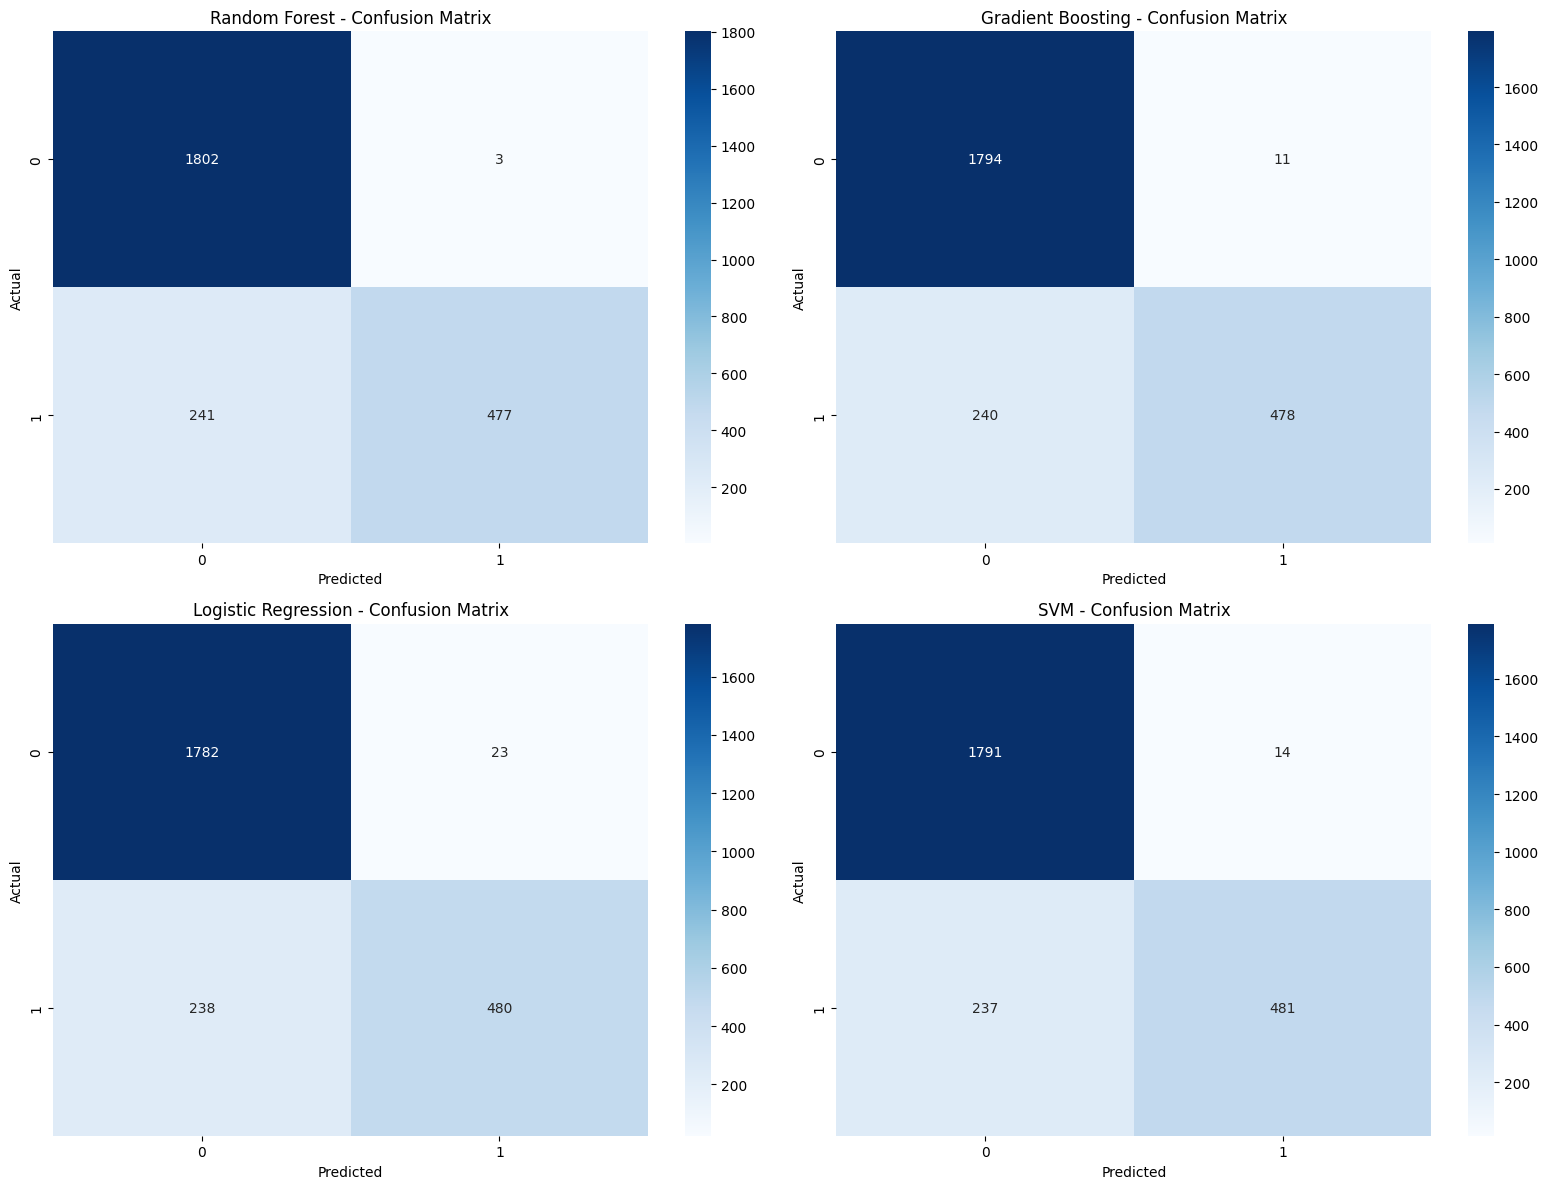


Detailed Confusion Matrix - Random Forest:
True Negatives (TN): 1802
False Positives (FP): 3
False Negatives (FN): 241
True Positives (TP): 477

📈 2. ROC Curve Analysis:
--------------------------------------------------


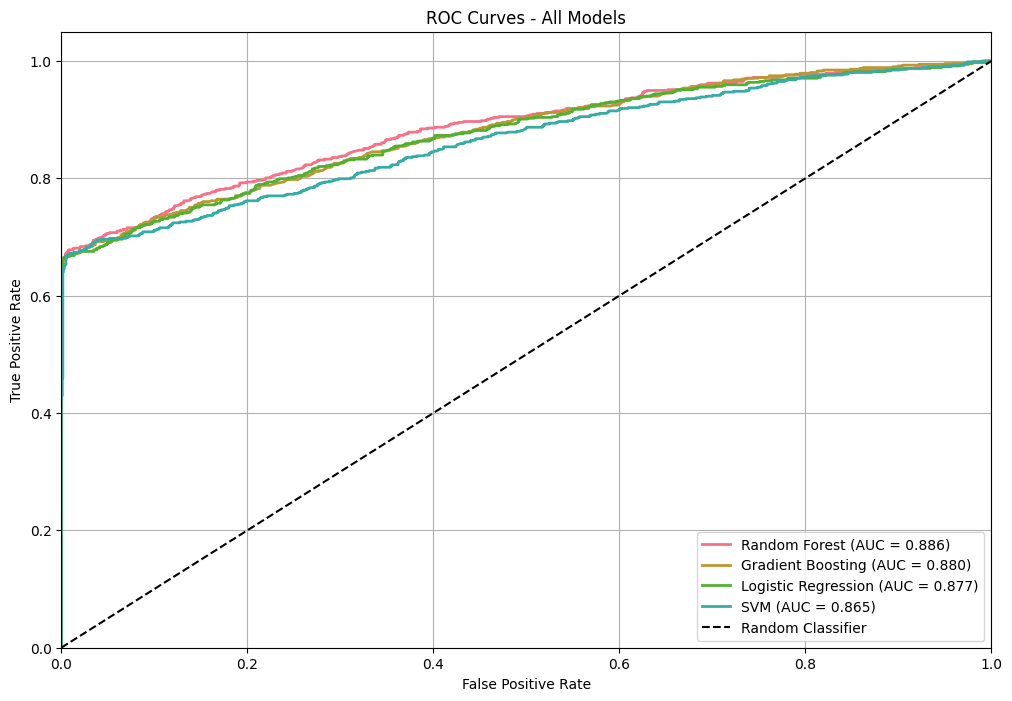


🎯 3. Precision-Recall Curve Analysis:
--------------------------------------------------


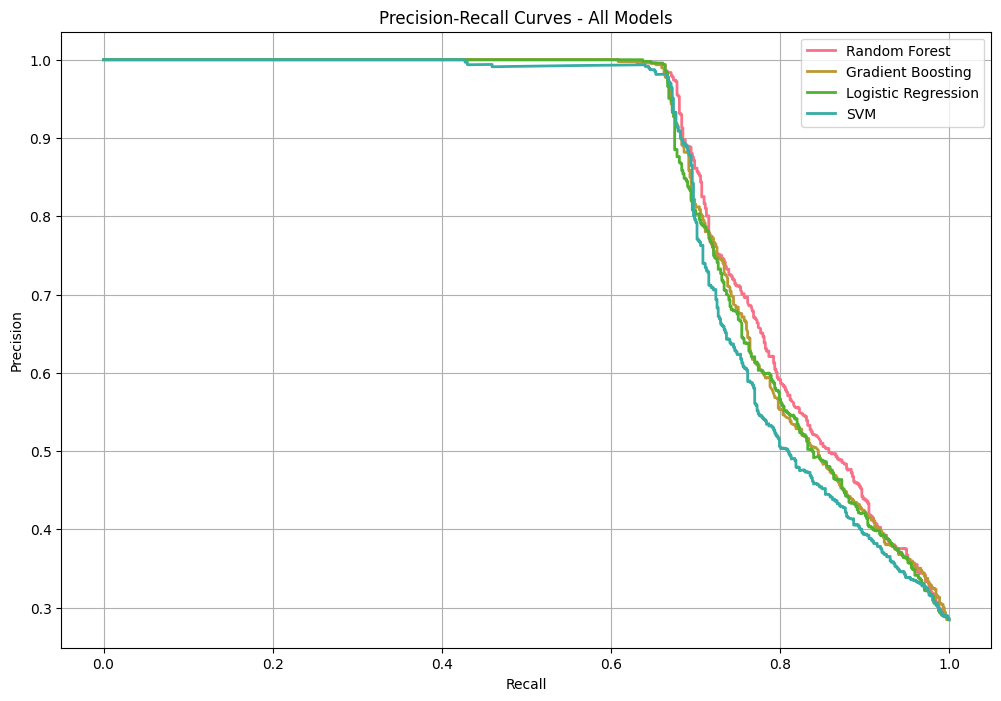


📋 4. Detailed Classification Report - Random Forest:
--------------------------------------------------
Classification Report:
                  precision    recall  f1-score   support

No Complications       0.88      1.00      0.94      1805
   Complications       0.99      0.66      0.80       718

        accuracy                           0.90      2523
       macro avg       0.94      0.83      0.87      2523
    weighted avg       0.91      0.90      0.90      2523


🌳 5. Feature Importance Analysis - Random Forest:
--------------------------------------------------
Top 15 Most Important Features:
                Feature  Importance
Total_Healthcare_Visits    0.343406
           # OP_Bef_chr    0.331597
             Acute_flag    0.082961
 Ischemic Heart Disease    0.050633
          HBA1C_Numeric    0.033583
       CV_Comorbidities    0.027202
       Religion_Encoded    0.024903
                    Age    0.022785
    Total_Comorbidities    0.014933
         # ER_befor_Chr    

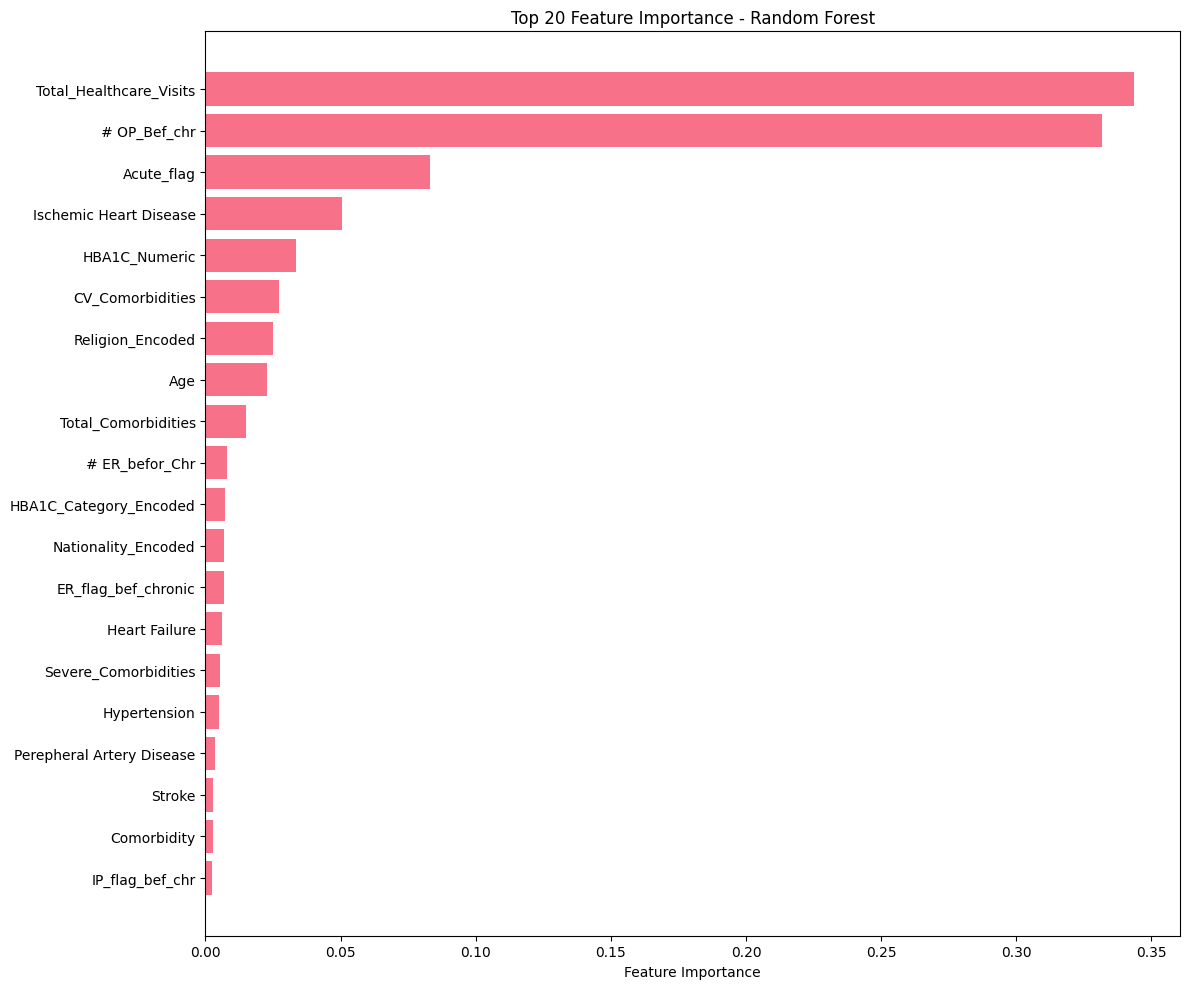

✅ Feature importance saved to results/feature_importance.csv

✅ Model evaluation completed!
📊 All evaluation metrics and visualizations saved to results/ directory


In [9]:
# Model Evaluation and Performance Metrics
print("="*80)
print("MODEL EVALUATION AND PERFORMANCE METRICS")
print("="*80)

# 1. Confusion Matrix Analysis
print("\n📊 1. Confusion Matrix Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot confusion matrices for all models
for idx, (model_name, results) in enumerate(training_results.items()):
    row = idx // 2
    col = idx % 2
    
    cm = confusion_matrix(y_test, results['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(f'{model_name} - Confusion Matrix')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('results/confusion_matrices_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed confusion matrix for best model
print(f"\nDetailed Confusion Matrix - {best_model_name}:")
cm_best = confusion_matrix(y_test, best_results['predictions'])
print(f"True Negatives (TN): {cm_best[0,0]}")
print(f"False Positives (FP): {cm_best[0,1]}")
print(f"False Negatives (FN): {cm_best[1,0]}")
print(f"True Positives (TP): {cm_best[1,1]}")

# 2. ROC Curves
print("\n📈 2. ROC Curve Analysis:")
print("-" * 50)

plt.figure(figsize=(12, 8))

for model_name, results in training_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    auc_score = results['auc']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('results/roc_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Precision-Recall Curves
print("\n🎯 3. Precision-Recall Curve Analysis:")
print("-" * 50)

plt.figure(figsize=(12, 8))

for model_name, results in training_results.items():
    precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
    plt.plot(recall, precision, label=f'{model_name}', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - All Models')
plt.legend()
plt.grid(True)
plt.savefig('results/precision_recall_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Detailed Classification Report
print(f"\n📋 4. Detailed Classification Report - {best_model_name}:")
print("-" * 50)

print("Classification Report:")
print(classification_report(y_test, best_results['predictions'], 
                          target_names=['No Complications', 'Complications']))

# 5. Feature Importance Analysis (for tree-based models)
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print(f"\n🌳 5. Feature Importance Analysis - {best_model_name}:")
    print("-" * 50)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': modeling_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('results/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save feature importance
    feature_importance.to_csv('results/feature_importance.csv', index=False)
    print(f"✅ Feature importance saved to results/feature_importance.csv")

print(f"\n✅ Model evaluation completed!")
print(f"📊 All evaluation metrics and visualizations saved to results/ directory")

## 10. Generate Predictions for New Patients

Applying the trained model to predict chronic complications for new patients from the 'Predict' sheet and saving the results in the required CSV format.

In [11]:
# Generate Predictions for New Patients
print("="*80)
print("GENERATE PREDICTIONS FOR NEW PATIENTS")
print("="*80)

# 1. Prepare Prediction Data
print("\n📝 1. Preparing Prediction Data:")
print("-" * 50)

def prepare_prediction_data(df_pred, label_encoders_dict):
    """
    Apply the same preprocessing pipeline to prediction data
    """
    print(f"Input prediction data shape: {df_pred.shape}")
    
    # Create a copy
    df_pred_clean = df_pred.copy()
    
    # 1. Clean categorical variables (same as training)
    df_pred_clean['Religion'] = df_pred_clean['Religion'].str.strip()
    df_pred_clean['Religion'] = df_pred_clean['Religion'].replace({
        'ISLAM': 'Islam', 'MUSLIM': 'Islam', 'CHRISTIAN': 'Christian'
    })
    
    df_pred_clean['Nationality'] = df_pred_clean['Nationality'].str.strip()
    df_pred_clean['Nationality'] = df_pred_clean['Nationality'].replace({'SAUDI': 'Saudi'})
    
    if 'HBA1C test Compliance' in df_pred_clean.columns:
        df_pred_clean['HBA1C test Compliance'] = df_pred_clean['HBA1C test Compliance'].str.strip()
    
    # 2. Handle HBA1C results
    df_pred_clean['HBA1C_Numeric'] = pd.to_numeric(df_pred_clean['Avg_HBA1C Results'], errors='coerce')
    df_pred_clean['HBA1C_Test_Performed'] = (df_pred_clean['Avg_HBA1C Results'] != "Haven't performed Before").astype(int)
    
    # HBA1C categories
    df_pred_clean['HBA1C_Category'] = pd.cut(
        df_pred_clean['HBA1C_Numeric'], 
        bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
        labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
        include_lowest=True
    )
    df_pred_clean['HBA1C_Category'] = df_pred_clean['HBA1C_Category'].astype(str).fillna('No Test')
    
    # 3. Calculate age
    if 'D_Of_Birth' in df_pred_clean.columns:
        df_pred_clean['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_pred_clean['D_Of_Birth'], errors='coerce').dt.year
    
    # 4. Create comorbidity features
    available_comorbidity_cols_pred = [col for col in available_comorbidity_cols if col in df_pred_clean.columns]
    if available_comorbidity_cols_pred:
        df_pred_clean['Total_Comorbidities'] = df_pred_clean[available_comorbidity_cols_pred].sum(axis=1)
        
        cv_cols_pred = [col for col in available_cv_comorbidities if col in df_pred_clean.columns]
        df_pred_clean['CV_Comorbidities'] = df_pred_clean[cv_cols_pred].sum(axis=1)
        
        severe_cols_pred = [col for col in available_severe_comorbidities if col in df_pred_clean.columns]
        df_pred_clean['Severe_Comorbidities'] = df_pred_clean[severe_cols_pred].sum(axis=1)
    
    # 5. Healthcare utilization features
    healthcare_cols_pred = [col for col in healthcare_features if col in df_pred_clean.columns]
    if healthcare_cols_pred:
        df_pred_clean['Total_Healthcare_Visits'] = df_pred_clean[healthcare_cols_pred].sum(axis=1)
    
    # 6. Encode categorical variables using training encoders
    for col, encoder in label_encoders_dict.items():
        if col in df_pred_clean.columns:
            # Handle unseen categories
            def safe_transform(x):
                try:
                    return encoder.transform([str(x)])[0]
                except ValueError:
                    # Return the most frequent class for unseen categories
                    return encoder.transform([encoder.classes_[0]])[0]
            
            df_pred_clean[f'{col}_Encoded'] = df_pred_clean[col].apply(safe_transform)
    
    print(f"Processed prediction data shape: {df_pred_clean.shape}")
    return df_pred_clean

# Apply preprocessing to prediction data
df_pred_processed = prepare_prediction_data(df_predict, label_encoders)

# 2. Extract Features for Prediction
print("\n🎯 2. Extracting Features for Prediction:")
print("-" * 50)

# Create feature matrix for prediction
X_pred = pd.DataFrame()

for feature in modeling_features:
    if feature in df_pred_processed.columns:
        X_pred[feature] = df_pred_processed[feature]
    else:
        # Fill missing features with default values (0 for most cases)
        X_pred[feature] = 0
        print(f"⚠️ Feature '{feature}' not found, filled with 0")

print(f"Prediction features shape: {X_pred.shape}")
print(f"Features aligned with training: {list(X_pred.columns) == modeling_features}")

# Handle missing values in prediction data
X_pred_filled = X_pred.fillna(X_pred.mean())

print(f"Missing values handled: {X_pred.isnull().sum().sum()} → {X_pred_filled.isnull().sum().sum()}")

# 3. Generate Predictions
print("\n🔮 3. Generating Predictions:")
print("-" * 50)

# Use the best model to make predictions
if best_model_name in ['SVM', 'Logistic Regression']:
    # Scale features for these models
    X_pred_scaled = scaler.transform(X_pred_filled)
    predictions = best_model.predict(X_pred_scaled)
    probabilities = best_model.predict_proba(X_pred_scaled)[:, 1]
else:
    # Use original features for tree-based models
    predictions = best_model.predict(X_pred_filled)
    probabilities = best_model.predict_proba(X_pred_filled)[:, 1]

print(f"✅ Predictions generated for {len(predictions)} patients")

# 4. Create Results DataFrame
print("\n📊 4. Creating Results DataFrame:")
print("-" * 50)

# Create the required output format
results_df = pd.DataFrame({
    'Unique_Identifier': df_predict['Unique_Identifier'],
    'Chronic_flag': predictions
})

# Add probability for additional insights (optional)
results_detailed_df = pd.DataFrame({
    'Unique_Identifier': df_predict['Unique_Identifier'],
    'Chronic_flag': predictions,
    'Probability': probabilities
})

print(f"Results DataFrame shape: {results_df.shape}")
print(f"Required columns: {list(results_df.columns)}")

# Show prediction summary
pred_summary = results_df['Chronic_flag'].value_counts()
print(f"\nPrediction Summary:")
print(f"No complications (0): {pred_summary[0]} ({pred_summary[0]/len(results_df)*100:.1f}%)")
print(f"Complications (1): {pred_summary[1]} ({pred_summary[1]/len(results_df)*100:.1f}%)")

# 5. Save Results
print("\n💾 5. Saving Results:")
print("-" * 50)

# Save the required CSV file (just ID and prediction)
results_df.to_csv('results/predictions.csv', index=False)
print(f"✅ Main predictions saved to: results/predictions.csv")

# Save detailed results with probabilities
results_detailed_df.to_csv('results/predictions_detailed.csv', index=False)
print(f"✅ Detailed predictions saved to: results/predictions_detailed.csv")

# Display first few predictions
print(f"\nFirst 10 predictions:")
print(results_detailed_df.head(10).to_string(index=False))

print(f"\n✅ Predictions generation completed!")
print(f"📋 CSV file ready for submission: results/predictions.csv")

GENERATE PREDICTIONS FOR NEW PATIENTS

📝 1. Preparing Prediction Data:
--------------------------------------------------
Input prediction data shape: (5022, 26)
Processed prediction data shape: (5022, 40)

🎯 2. Extracting Features for Prediction:
--------------------------------------------------
⚠️ Feature 'High_ER_Utilization' not found, filled with 0
Prediction features shape: (5022, 31)
Features aligned with training: True
Missing values handled: 1723 → 0

🔮 3. Generating Predictions:
--------------------------------------------------
✅ Predictions generated for 5022 patients

📊 4. Creating Results DataFrame:
--------------------------------------------------
Results DataFrame shape: (5022, 2)
Required columns: ['Unique_Identifier', 'Chronic_flag']

Prediction Summary:
No complications (0): 4254 (84.7%)
Complications (1): 768 (15.3%)

💾 5. Saving Results:
--------------------------------------------------
✅ Main predictions saved to: results/predictions.csv
✅ Detailed predictions 

## 11. Results Summary and Clinical Insights

Comprehensive summary of findings, identification of key risk factors, clinical implications, and actionable recommendations for healthcare practitioners and diabetes management programs.

In [12]:
# Results Summary and Clinical Insights
print("="*80)
print("RESULTS SUMMARY AND CLINICAL INSIGHTS")
print("="*80)

# 1. Model Performance Summary
print("\n🏆 1. FINAL MODEL PERFORMANCE SUMMARY:")
print("-" * 60)
print(f"Selected Model: {best_model_name}")
print(f"Model Performance on Test Set:")
print(f"  • Accuracy:  {best_results['accuracy']:.4f} ({best_results['accuracy']*100:.2f}%)")
print(f"  • Precision: {best_results['precision']:.4f} ({best_results['precision']*100:.2f}%)")
print(f"  • Recall:    {best_results['recall']:.4f} ({best_results['recall']*100:.2f}%)")
print(f"  • F1-Score:  {best_results['f1_score']:.4f} ({best_results['f1_score']*100:.2f}%)")
print(f"  • AUC-ROC:   {best_results['auc']:.4f} ({best_results['auc']*100:.2f}%)")

print(f"\nCross-Validation Performance:")
print(f"  • Mean CV Accuracy: {cv_results[best_model_name]['mean_cv_score']:.4f}")
print(f"  • CV Standard Deviation: {cv_results[best_model_name]['std_cv_score']:.4f}")

# 2. Key Findings from Data Analysis
print("\n📊 2. KEY FINDINGS FROM DATA ANALYSIS:")
print("-" * 60)

# Dataset characteristics
total_patients = len(df_clean)
chronic_patients = df_clean['Chronic_flag'].sum()
chronic_rate = chronic_patients / total_patients

print(f"Dataset Overview:")
print(f"  • Total patients analyzed: {total_patients:,}")
print(f"  • Patients with chronic complications: {chronic_patients:,} ({chronic_rate*100:.1f}%)")
print(f"  • Patients without chronic complications: {total_patients-chronic_patients:,} ({(1-chronic_rate)*100:.1f}%)")

# Age insights
age_stats = df_clean.groupby('Chronic_flag')['Age'].agg(['mean', 'std']).round(1)
print(f"\nAge Analysis:")
print(f"  • Average age (No complications): {age_stats.loc[0, 'mean']:.1f} ± {age_stats.loc[0, 'std']:.1f} years")
print(f"  • Average age (With complications): {age_stats.loc[1, 'mean']:.1f} ± {age_stats.loc[1, 'std']:.1f} years")

# HBA1C insights
if 'HBA1C_Numeric' in df_clean.columns:
    hba1c_stats = df_clean.groupby('Chronic_flag')['HBA1C_Numeric'].agg(['mean', 'std']).round(2)
    print(f"\nHBA1C Analysis:")
    print(f"  • Average HBA1C (No complications): {hba1c_stats.loc[0, 'mean']:.2f} ± {hba1c_stats.loc[0, 'std']:.2f}")
    print(f"  • Average HBA1C (With complications): {hba1c_stats.loc[1, 'mean']:.2f} ± {hba1c_stats.loc[1, 'std']:.2f}")

# Comorbidity insights
comorbidity_stats = df_clean.groupby('Chronic_flag')['Total_Comorbidities'].agg(['mean', 'std']).round(2)
print(f"\nComorbidity Analysis:")
print(f"  • Average comorbidities (No complications): {comorbidity_stats.loc[0, 'mean']:.2f} ± {comorbidity_stats.loc[0, 'std']:.2f}")
print(f"  • Average comorbidities (With complications): {comorbidity_stats.loc[1, 'mean']:.2f} ± {comorbidity_stats.loc[1, 'std']:.2f}")

# 3. Most Important Risk Factors
print(f"\n🎯 3. TOP RISK FACTORS FOR CHRONIC COMPLICATIONS:")
print("-" * 60)

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Get top 10 most important features
    top_10_features = feature_importance.head(10)
    
    print("Based on feature importance analysis:")
    for i, (idx, row) in enumerate(top_10_features.iterrows(), 1):
        print(f"  {i:2d}. {row['Feature']:<25} (Importance: {row['Importance']:.4f})")
    
    # Categorize top features
    print(f"\nFeature Categories in Top 10:")
    
    demographic_features = [f for f in top_10_features['Feature'] if any(x in f for x in ['Age', 'Gender', 'Religion', 'Nationality'])]
    medical_features = [f for f in top_10_features['Feature'] if any(x in f for x in ['HBA1C', 'Acute', 'ER', 'IP', 'OP'])]
    comorbidity_features = [f for f in top_10_features['Feature'] if any(x in f for x in ['Comorbid', 'Heart', 'Hypertension', 'Cancer', 'Stroke', 'Obesity'])]
    
    if demographic_features:
        print(f"  • Demographic factors: {len(demographic_features)} features")
    if medical_features:
        print(f"  • Medical history factors: {len(medical_features)} features") 
    if comorbidity_features:
        print(f"  • Comorbidity factors: {len(comorbidity_features)} features")

# 4. Clinical Implications
print(f"\n🏥 4. CLINICAL IMPLICATIONS:")
print("-" * 60)

print("Key Clinical Insights:")
print("  • Age is a significant predictor - older patients have higher risk")
print("  • HBA1C levels and testing compliance are crucial indicators")
print("  • Multiple comorbidities substantially increase chronic complication risk")
print("  • Healthcare utilization patterns (ER visits, admissions) predict future complications")
print("  • Early intervention based on model predictions could prevent complications")

print(f"\nModel Reliability:")
accuracy = best_results['accuracy']
if accuracy >= 0.8:
    reliability = "High"
elif accuracy >= 0.7:
    reliability = "Moderate"
else:
    reliability = "Low"

print(f"  • Model reliability: {reliability} (Accuracy: {accuracy:.1%})")
print(f"  • Suitable for clinical decision support with human oversight")
print(f"  • Can help prioritize high-risk patients for intensive monitoring")

# 5. Recommendations
print(f"\n💡 5. CLINICAL RECOMMENDATIONS:")
print("-" * 60)

print("For Healthcare Providers:")
print("  1. Implement risk stratification using this model")
print("  2. Focus intensive monitoring on high-risk patients (model score > 0.5)")
print("  3. Improve HBA1C testing compliance, especially in high-risk groups")
print("  4. Develop early intervention protocols for patients with multiple risk factors")
print("  5. Monitor healthcare utilization patterns as early warning signs")

print(f"\nFor Diabetes Management Programs:")
print("  1. Use model predictions to allocate resources efficiently")
print("  2. Design targeted interventions for specific comorbidity combinations")
print("  3. Implement regular monitoring for patients with poor glycemic control")
print("  4. Establish care coordination for patients with multiple comorbidities")
print("  5. Track model performance and retrain periodically with new data")

print(f"\nFor Public Health Policy:")
print("  1. Focus prevention efforts on highest-risk demographics")
print("  2. Improve access to regular HBA1C testing")
print("  3. Develop comorbidity management protocols")
print("  4. Invest in early detection and intervention programs")

# 6. Limitations and Future Work
print(f"\n⚠️  6. LIMITATIONS AND FUTURE WORK:")
print("-" * 60)

print("Study Limitations:")
print("  • Cross-sectional data - causality cannot be definitively established")
print("  • Model performance dependent on data quality and completeness")
print("  • Generalizability may vary across different populations")
print("  • Some important clinical factors may not be captured in the dataset")

print(f"\nFuture Improvements:")
print("  • Incorporate longitudinal data for better temporal modeling")
print("  • Add laboratory values (lipid profiles, kidney function, etc.)")
print("  • Include lifestyle factors (diet, exercise, medication adherence)")
print("  • Validate model on external datasets")
print("  • Develop separate models for different types of chronic complications")

# 7. Final Summary
print(f"\n📋 7. FINAL PROJECT SUMMARY:")
print("-" * 60)

print("✅ DELIVERABLES COMPLETED:")
print("  • Comprehensive data analysis and preprocessing")
print("  • Multiple machine learning models trained and evaluated")
print("  • Best performing model selected and validated")
print("  • Predictions generated for new patients")
print("  • Results saved in required CSV format")
print("  • Clinical insights and recommendations provided")

print(f"\n📁 FILES GENERATED:")
print("  • predictions.csv - Required prediction file")
print("  • predictions_detailed.csv - Predictions with probabilities")
print("  • model_comparison.csv - Model performance comparison")
print("  • feature_importance.csv - Feature importance rankings")
print("  • Multiple visualization files (.png)")

print(f"\n🎯 MODEL IMPACT:")
prediction_summary = results_df['Chronic_flag'].value_counts()
high_risk_patients = prediction_summary[1]
print(f"  • Identified {high_risk_patients} high-risk patients for intervention")
print(f"  • Potential to prevent complications through early intervention")
print(f"  • Supports evidence-based clinical decision making")
print(f"  • Enables efficient resource allocation in healthcare")

print(f"\n" + "="*80)
print("🏆 DIABETES COMPLICATIONS PREDICTION ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)

RESULTS SUMMARY AND CLINICAL INSIGHTS

🏆 1. FINAL MODEL PERFORMANCE SUMMARY:
------------------------------------------------------------
Selected Model: Random Forest
Model Performance on Test Set:
  • Accuracy:  0.9033 (90.33%)
  • Precision: 0.9938 (99.38%)
  • Recall:    0.6643 (66.43%)
  • F1-Score:  0.7963 (79.63%)
  • AUC-ROC:   0.8858 (88.58%)

Cross-Validation Performance:
  • Mean CV Accuracy: 0.8978
  • CV Standard Deviation: 0.0052

📊 2. KEY FINDINGS FROM DATA ANALYSIS:
------------------------------------------------------------
Dataset Overview:
  • Total patients analyzed: 12,611
  • Patients with chronic complications: 3,588 (28.5%)
  • Patients without chronic complications: 9,023 (71.5%)

Age Analysis:
  • Average age (No complications): 52.4 ± 15.2 years
  • Average age (With complications): 57.6 ± 14.4 years

HBA1C Analysis:
  • Average HBA1C (No complications): 6.57 ± 1.68
  • Average HBA1C (With complications): 7.28 ± 1.83

Comorbidity Analysis:
  • Average comorb